In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("C://Users//91971//Desktop//HIMS_DataScience_Project//dataset//HMIS_Cleaned.csv")

In [22]:
print("Shape:", df.shape)
print("Columns:", df.columns[:10])
print("Missing values:", df.isnull().sum().sum())
print("Data Types:\n", df.dtypes.value_counts())

Shape: (7019, 254)
Columns: Index(['Country', 'State', 'District', 'Sub-District', 'Month',
       'Type_Of_Facility',
       'Number_Of_Spontaneous_Abortion_(UOM:Number),_Scaling_Factor:1',
       'Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1',
       'Number_Of_Ayush_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1',
       'Blood_Units_Issued_On_Replacement_(Any_Donors_To_Be_Considered_As_Replacement_Donations)_(UOM:Number),_Scaling_Factor:1'],
      dtype='object')
Missing values: 0
Data Types:
 float64    247
object       6
int64        1
Name: count, dtype: int64


In [23]:
# 5. Feature Identification
# ===============================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Total numeric indicators:", len(num_cols))

Total numeric indicators: 248


In [24]:
indicator_means = df[num_cols].mean().sort_values(ascending=False)
top_indicators = indicator_means.head(10)


In [25]:
top_indicators

Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1                                                                                    35397.399466
Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1                                                                  32939.992736
Number_Of_Condom_Pieces_Distributed_(UOM:Number),_Scaling_Factor:1                                                                           7568.599551
Number_Of_Children_(6-59_Months)_Provided_8-10_Doses_(1ml)_Of_Iron_And_Folic_Acid_(Ifa)_Syrup_(Bi_Weekly)_(UOM:Number),_Scaling_Factor:1     5410.006119
Number_Of_Haemoglobin_(Hb)_Tests_Conducted__(UOM:Number),_Scaling_Factor:1                                                                   4112.219245
In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1                                                                             3727.930930
Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1                                 

C:\Users\91971\AppData\Local\Temp\ipykernel_6740\3199860443.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


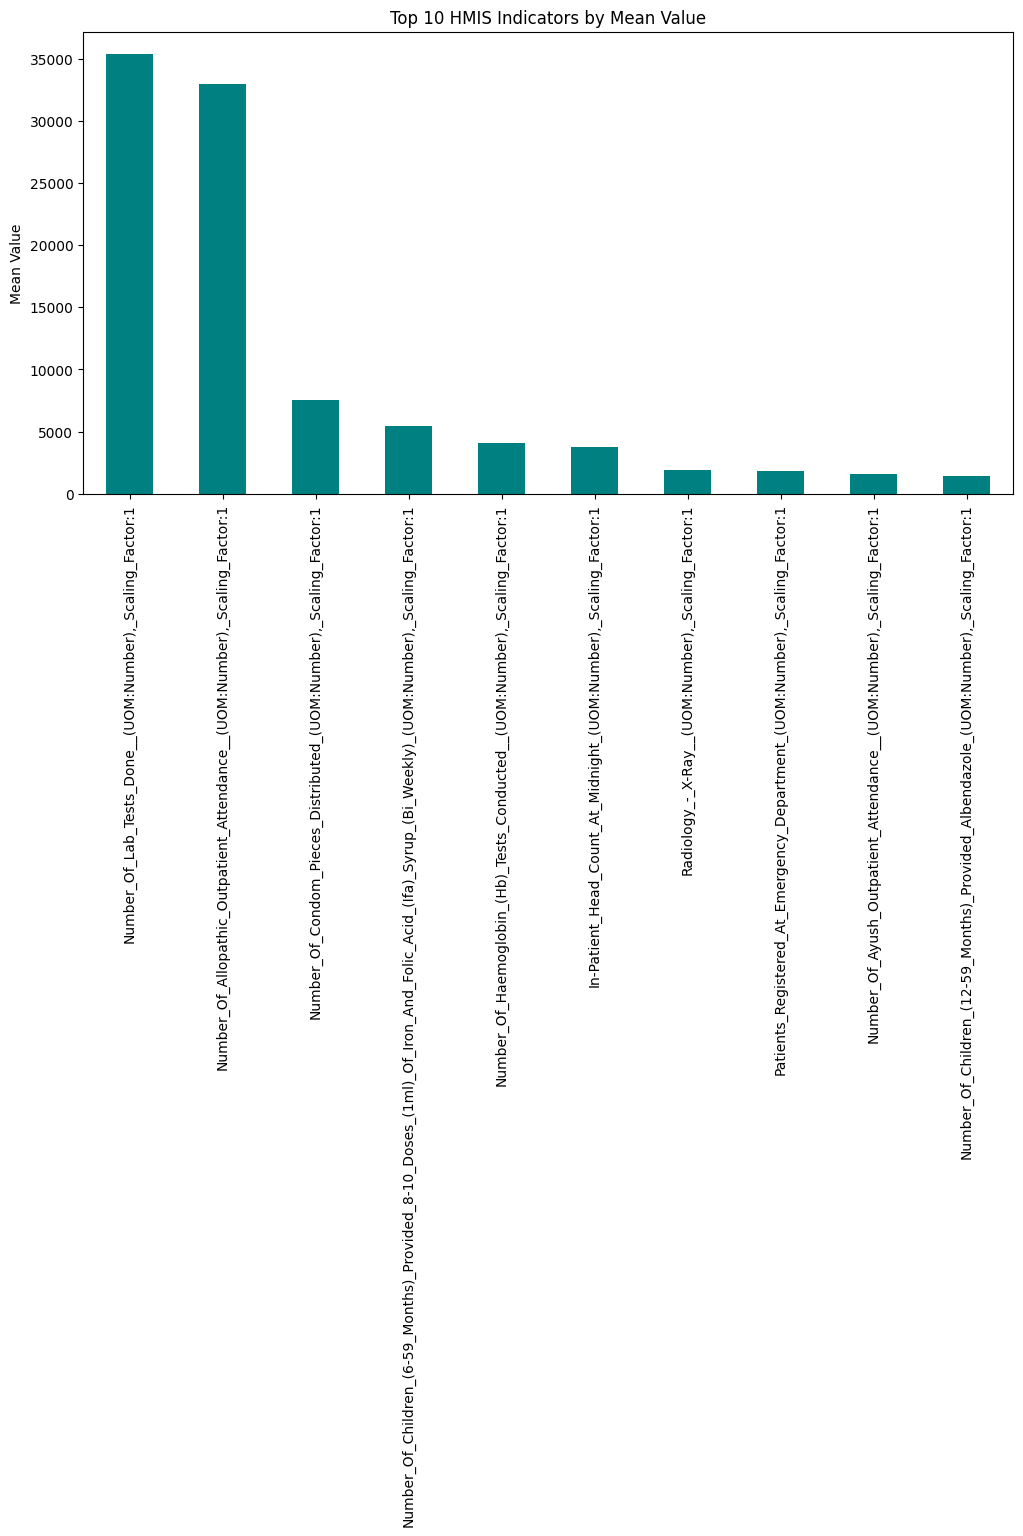

In [26]:
# 5.1 Plot Top 10 Indicators
# ===============================
plt.figure(figsize=(12, 6))
top_indicators.plot(kind='bar', color='teal')
plt.title("Top 10 HMIS Indicators by Mean Value")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

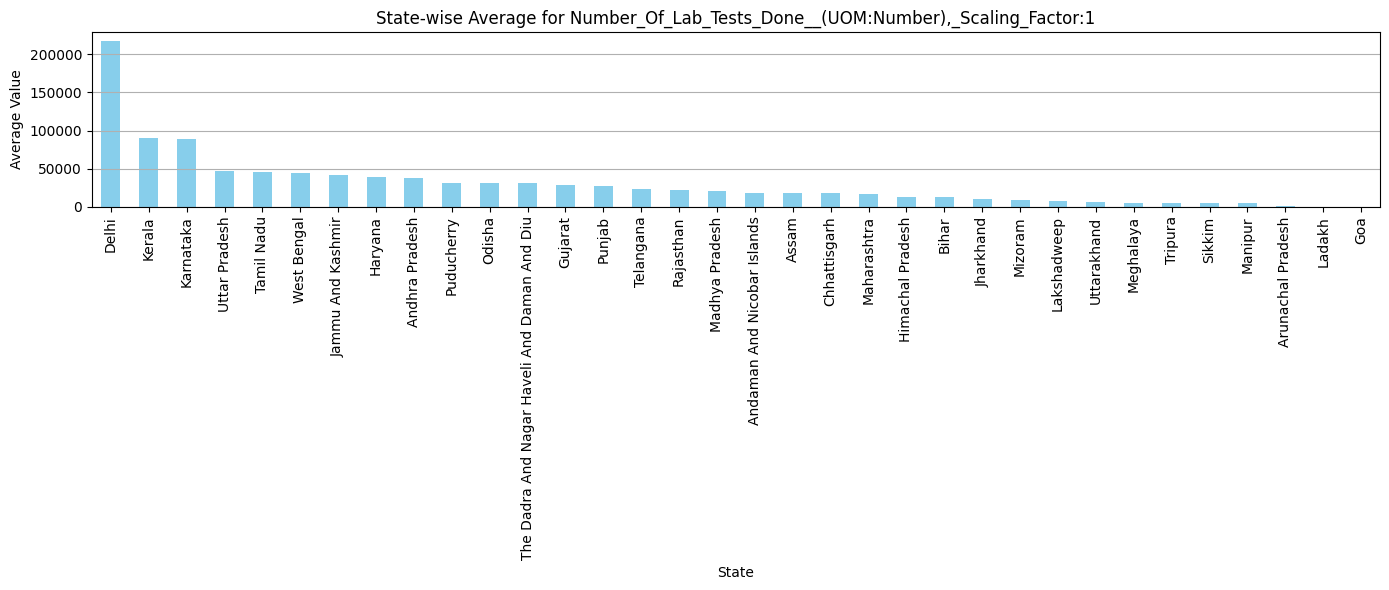

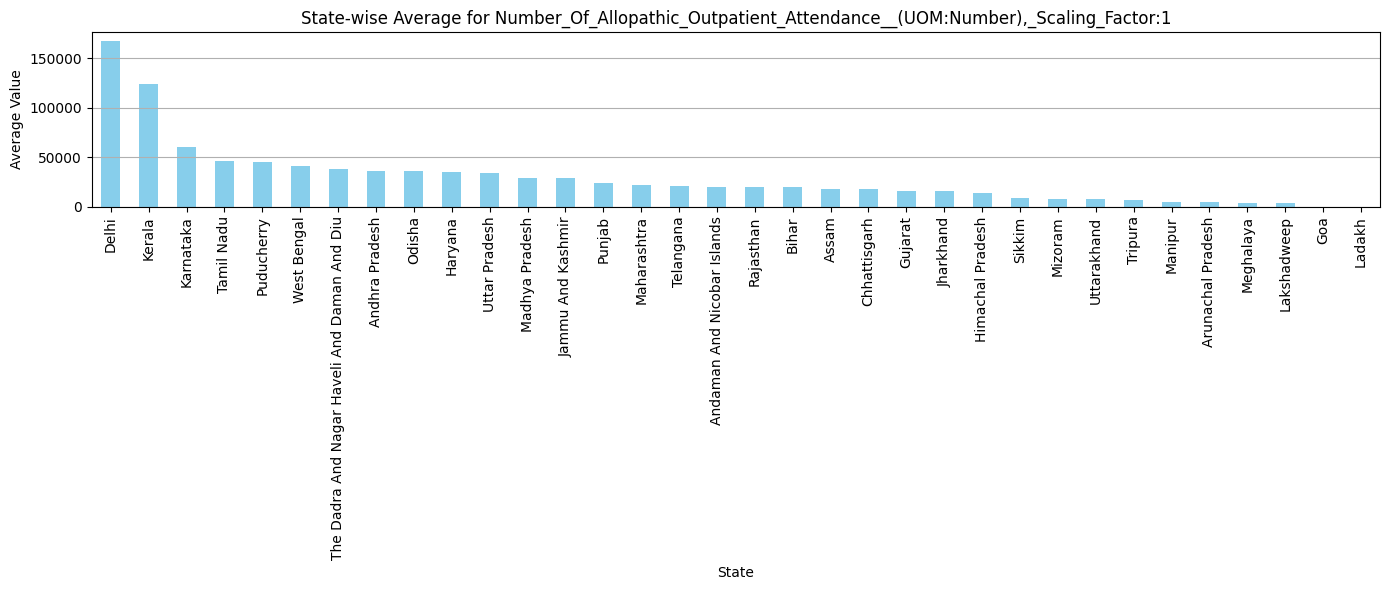

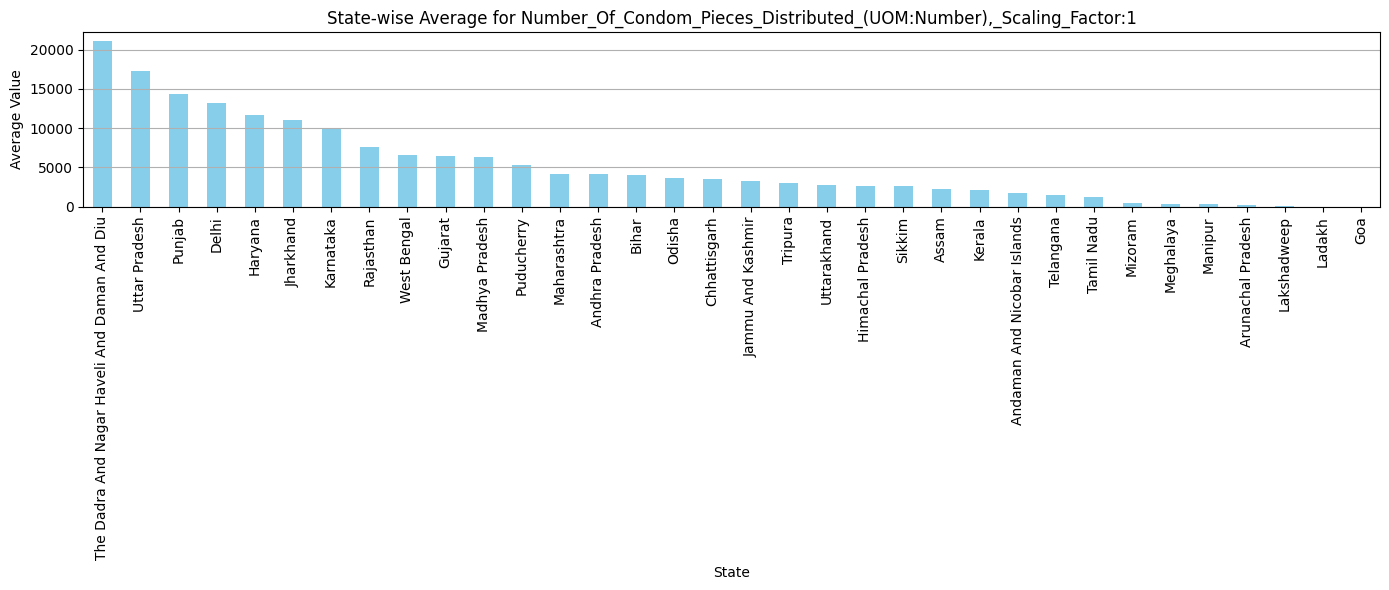

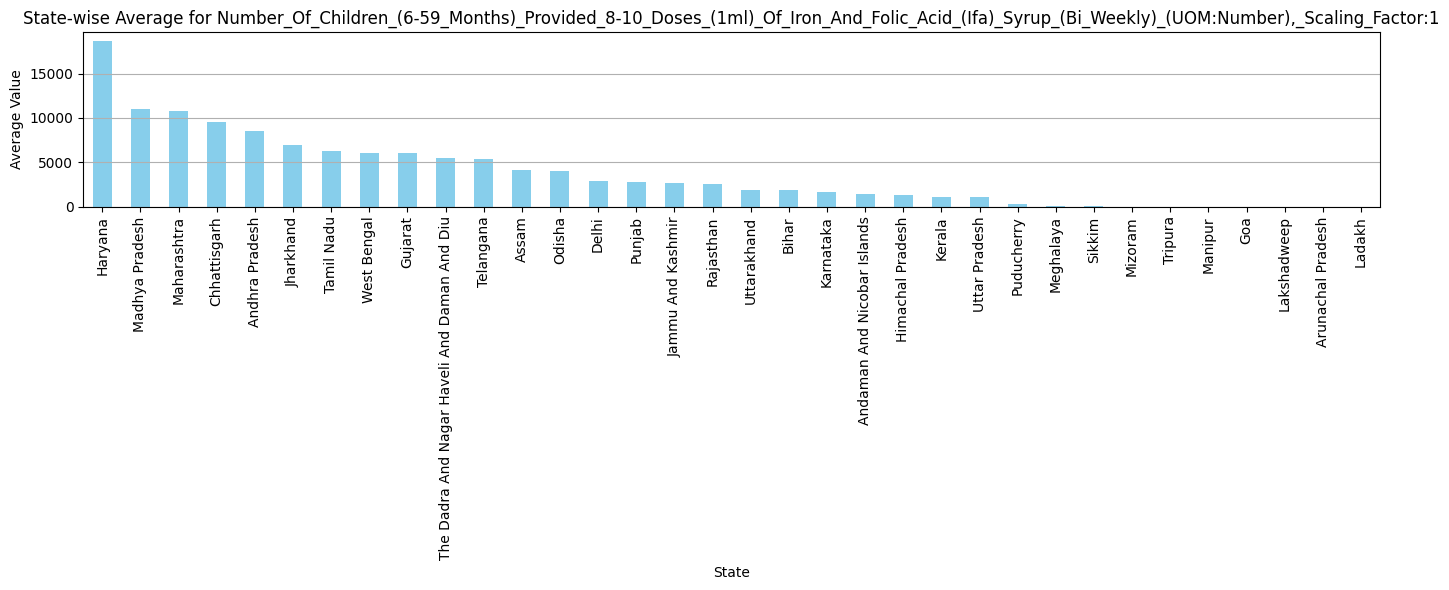

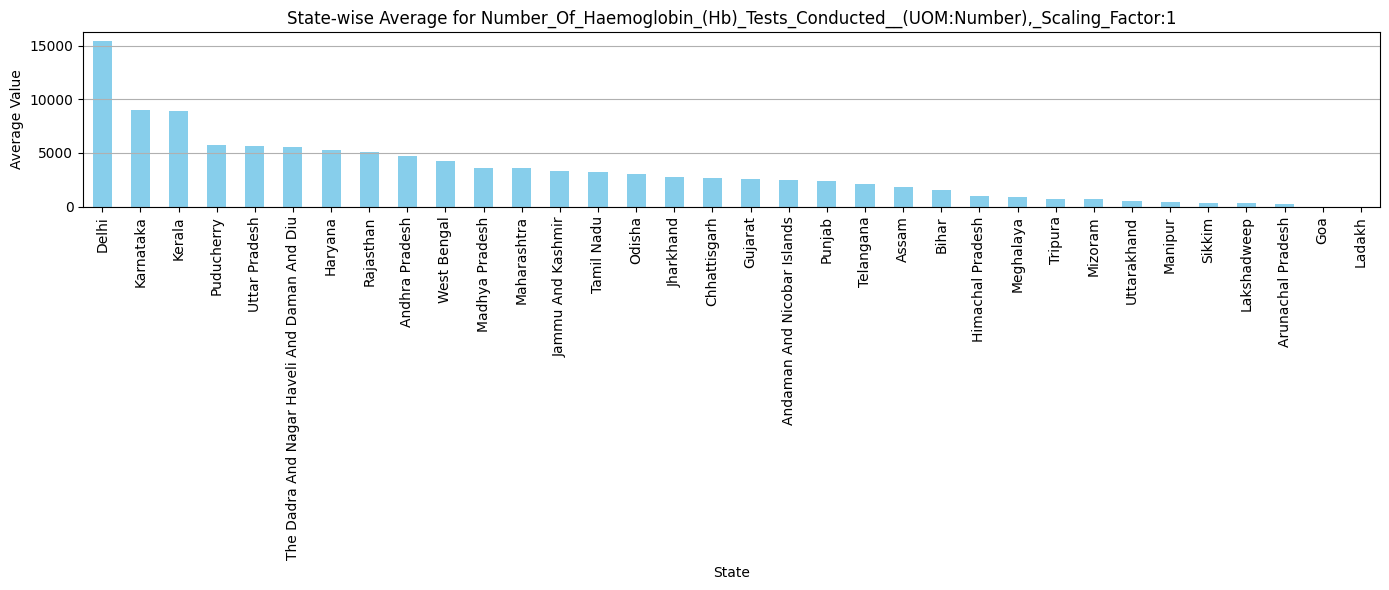

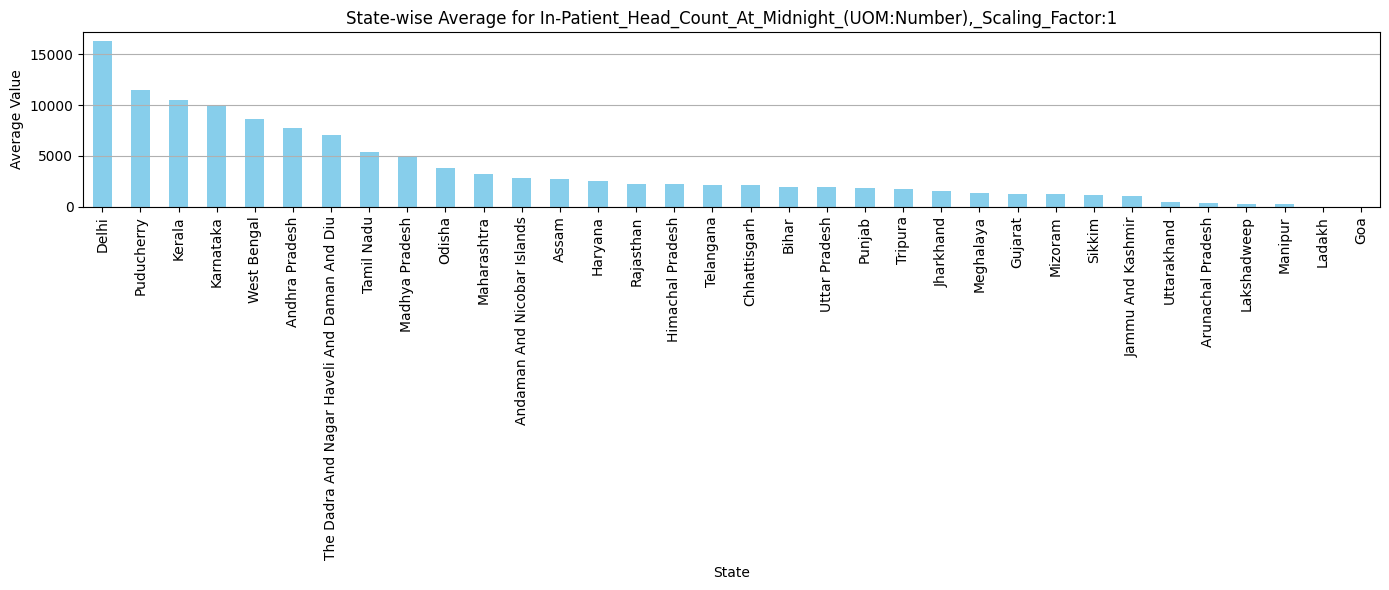

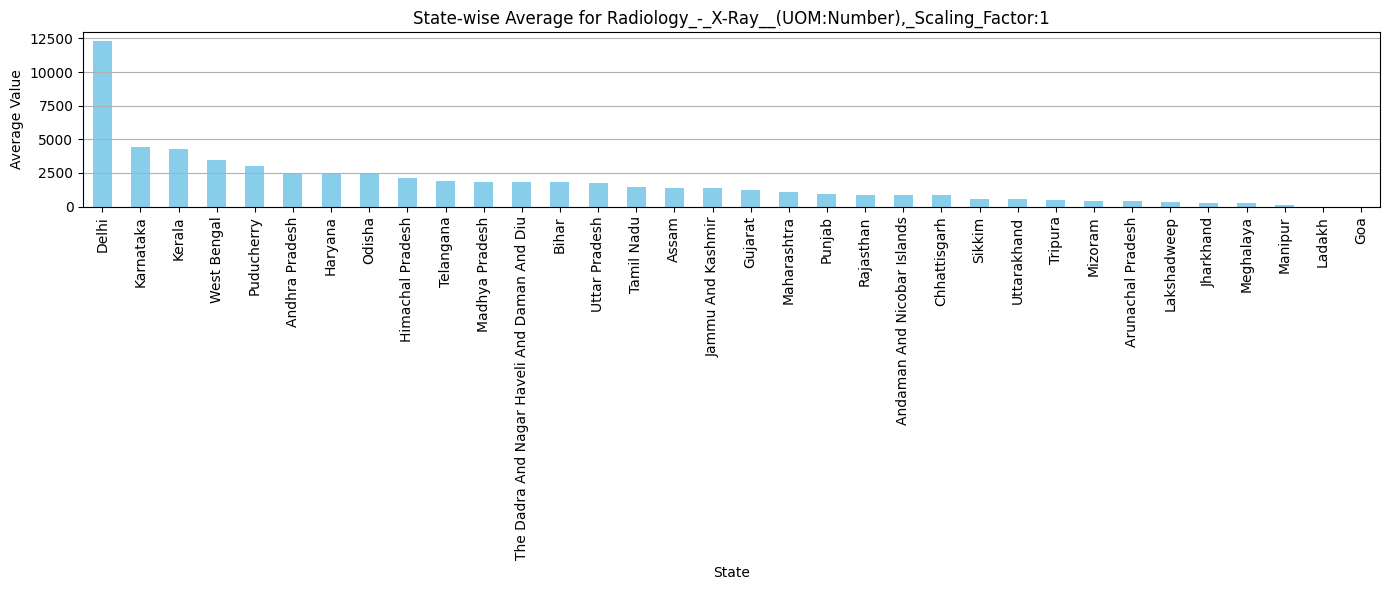

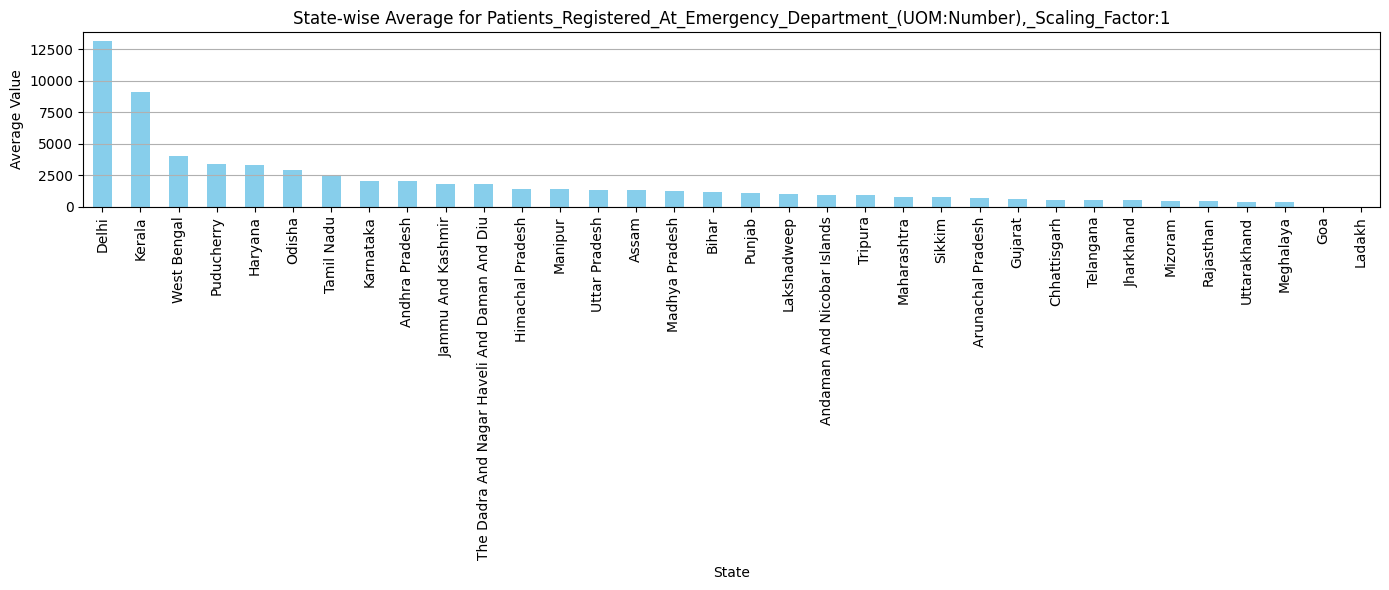

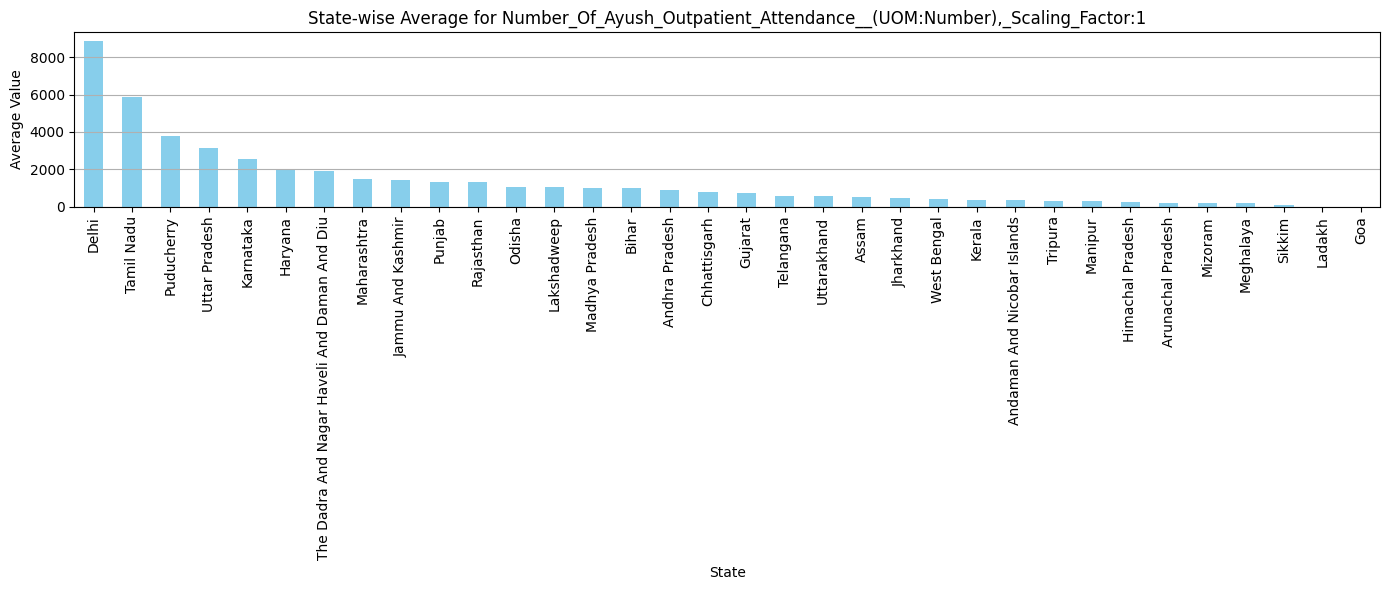

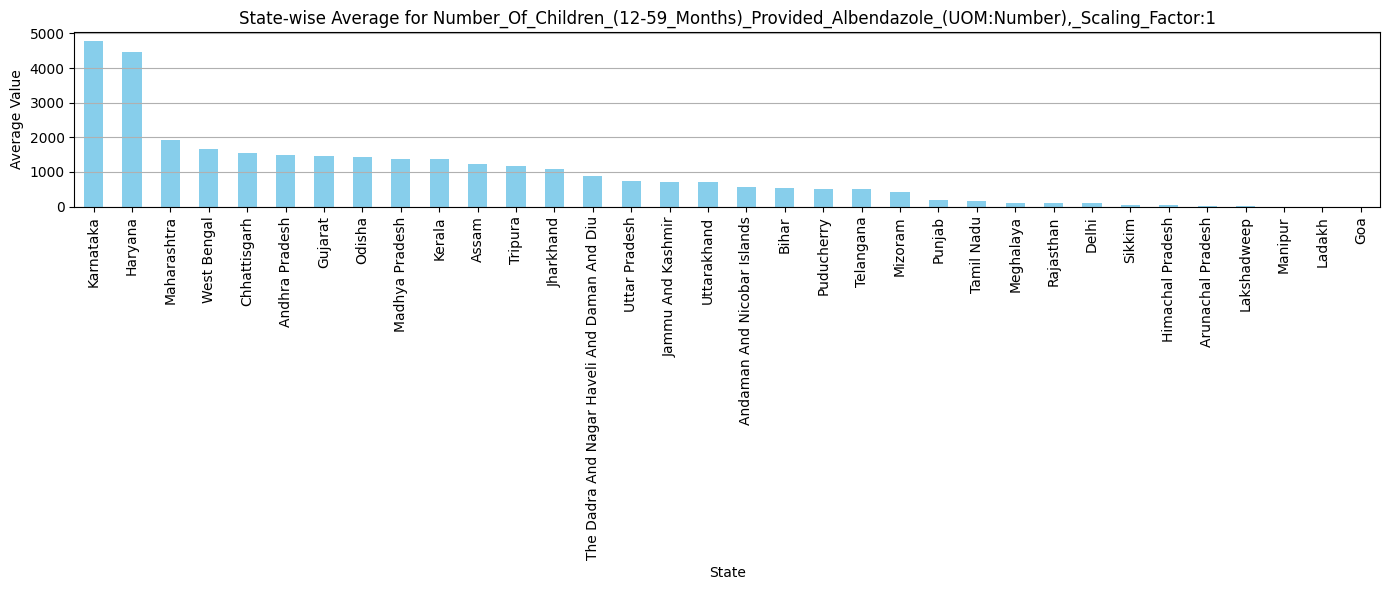

In [27]:
# State-wise & District-wise Analysis for Top 10 Indicators
# ===============================

# Grouped averages
state_grouped = df.groupby('State')[top_indicators.index].mean()
district_grouped_all = df.groupby('District')[top_indicators.index].mean()

# Loop through each top indicator
for indicator in top_indicators.index:
    # --- State-wise ---
    plt.figure(figsize=(14, 6))
    state_grouped[indicator].sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title(f"State-wise Average for {indicator}")
    plt.ylabel("Average Value")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


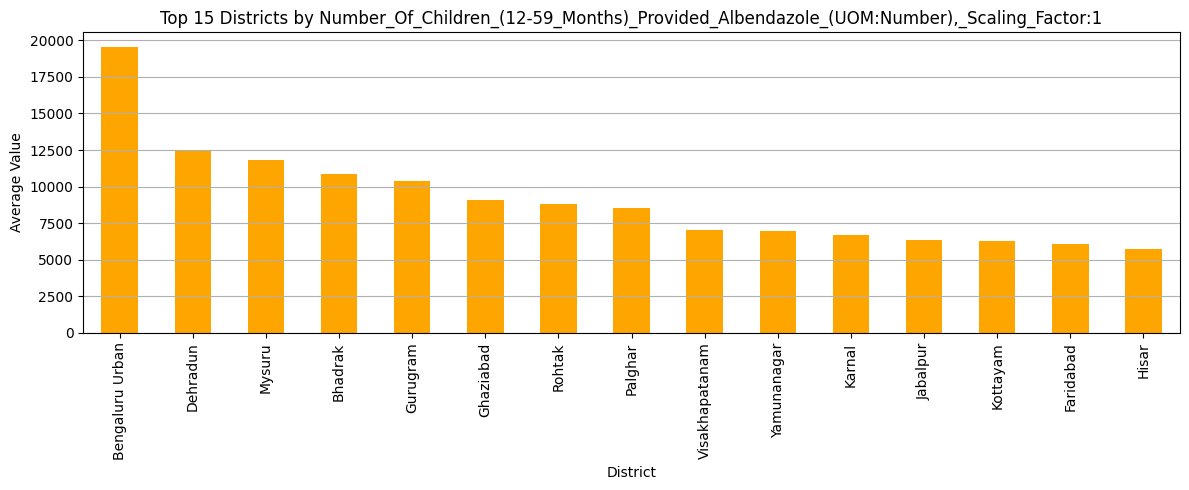

In [28]:
    # --- District-wise (Top 15 only) ---
    plt.figure(figsize=(12, 5))
    district_grouped_all[indicator].sort_values(ascending=False).head(15).plot(kind='bar', color='orange')
    plt.title(f"Top 15 Districts by {indicator}")
    plt.ylabel("Average Value")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

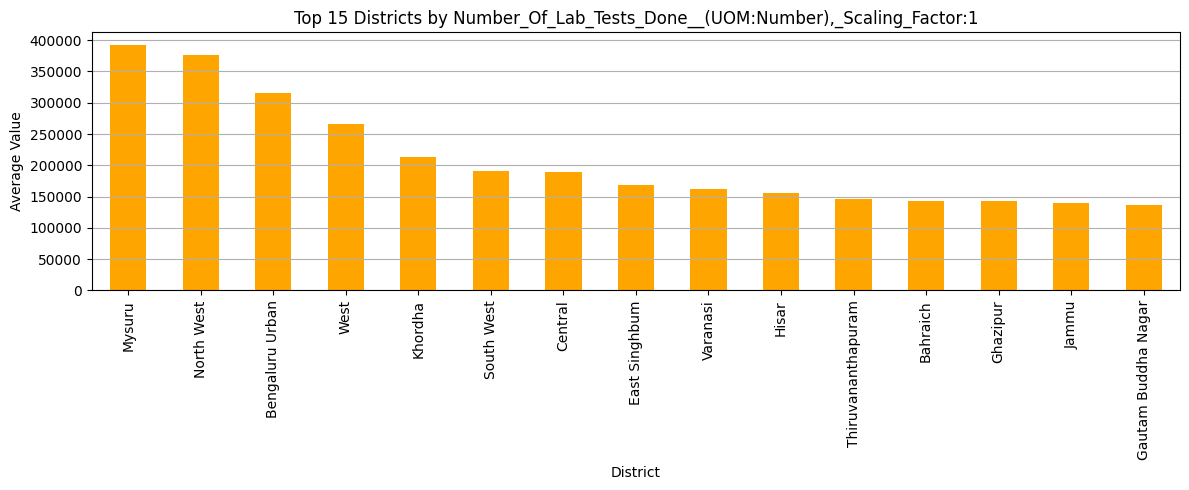

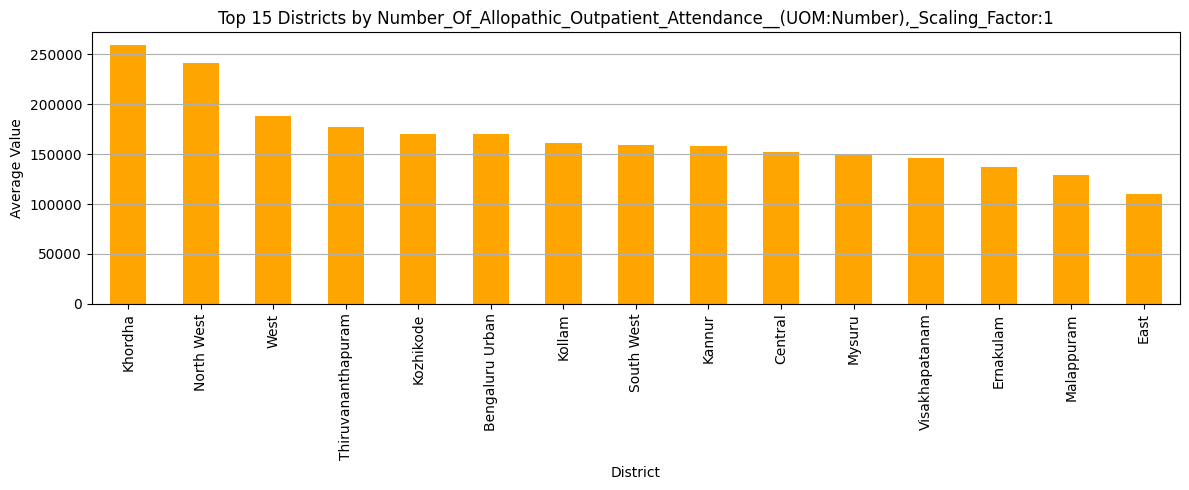

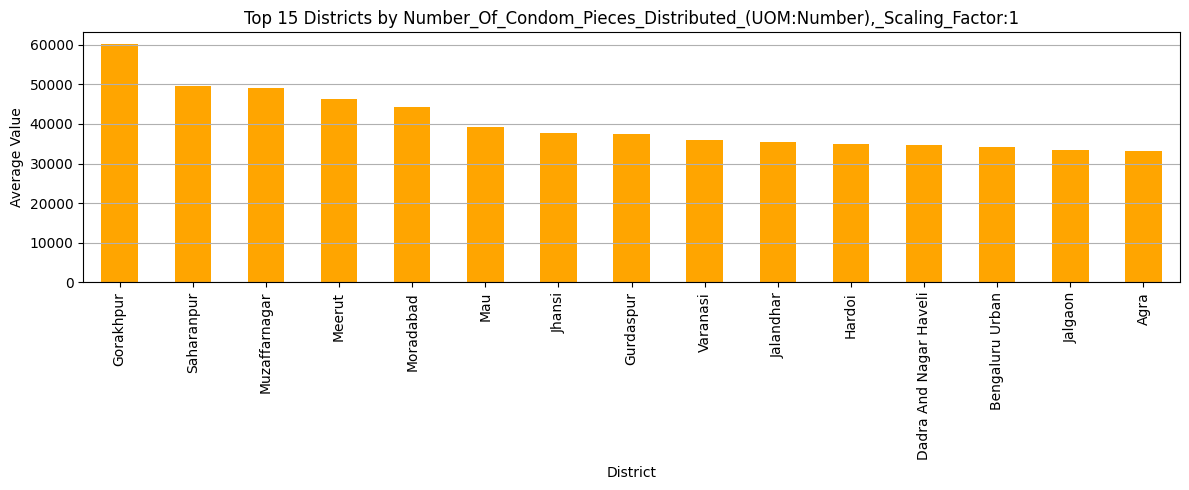

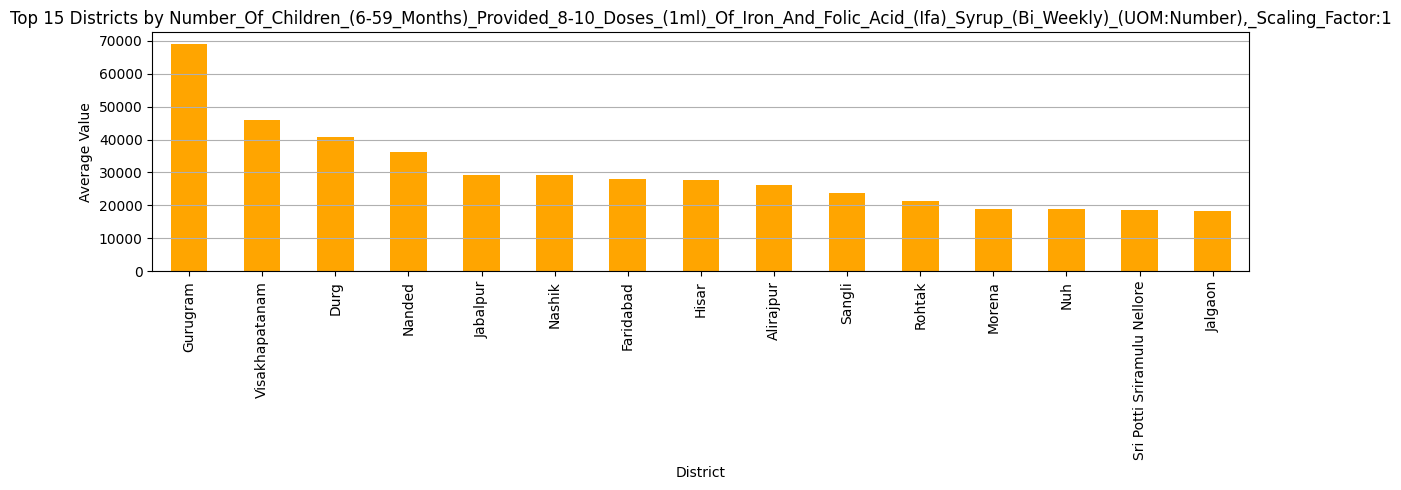

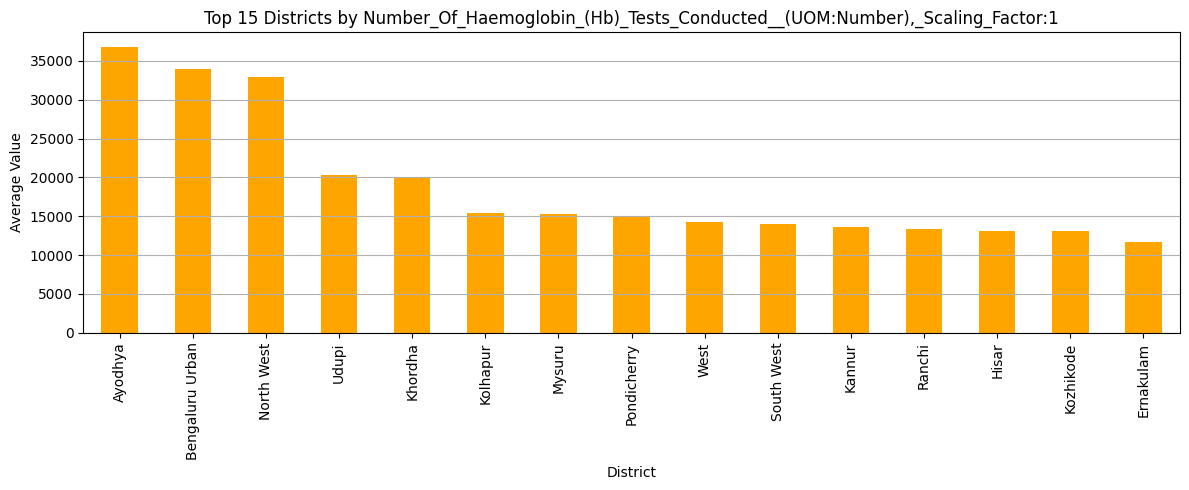

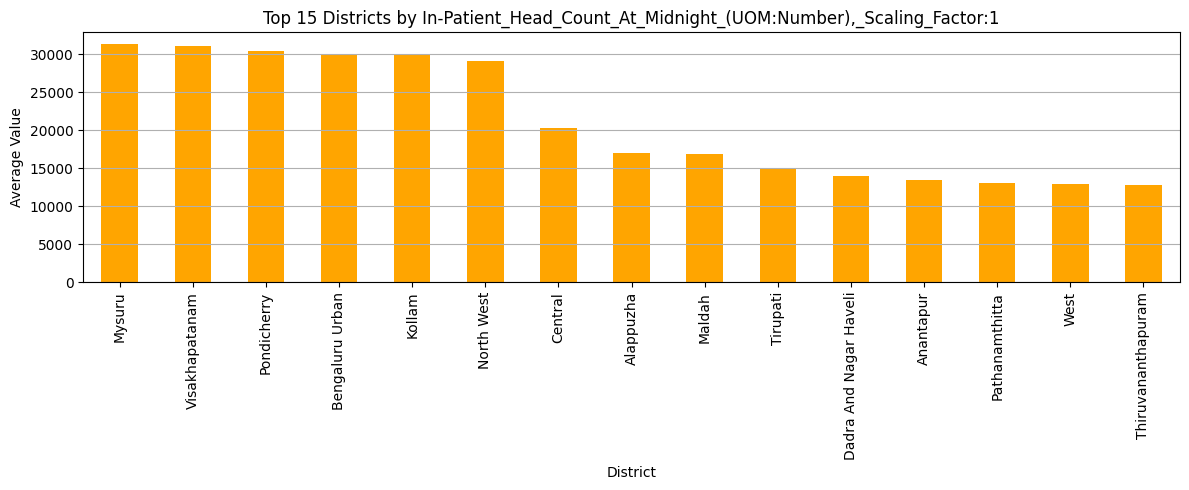

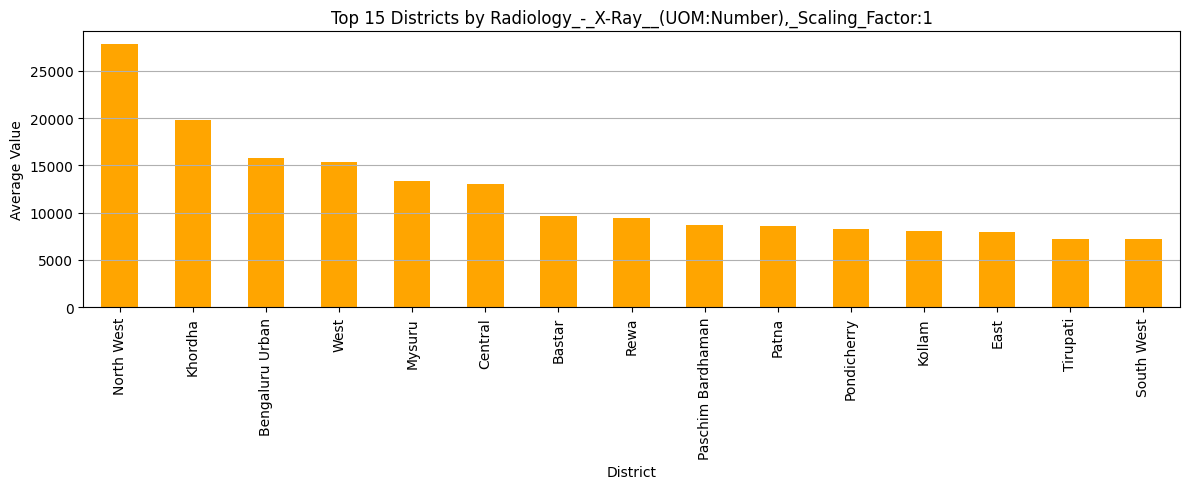

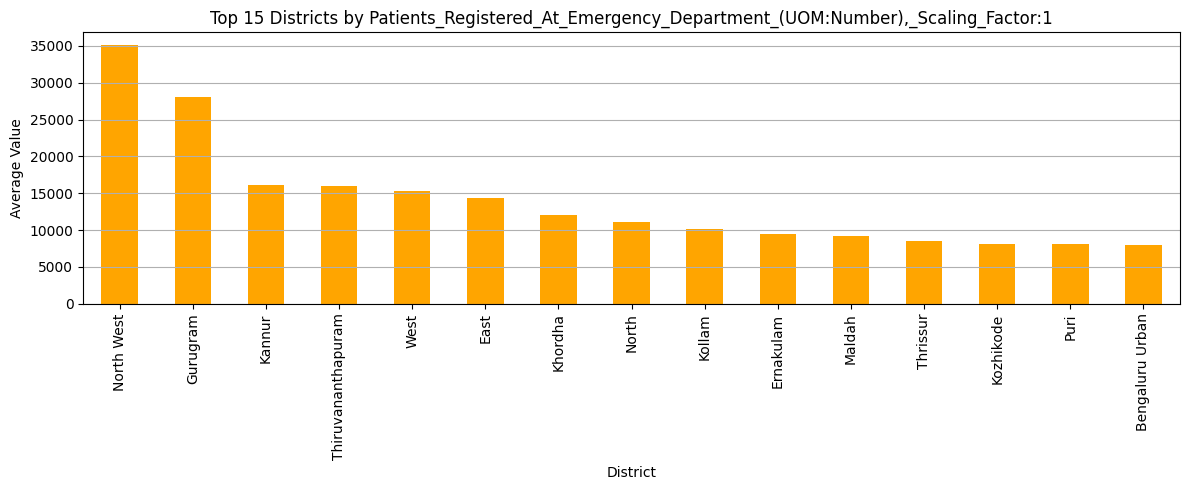

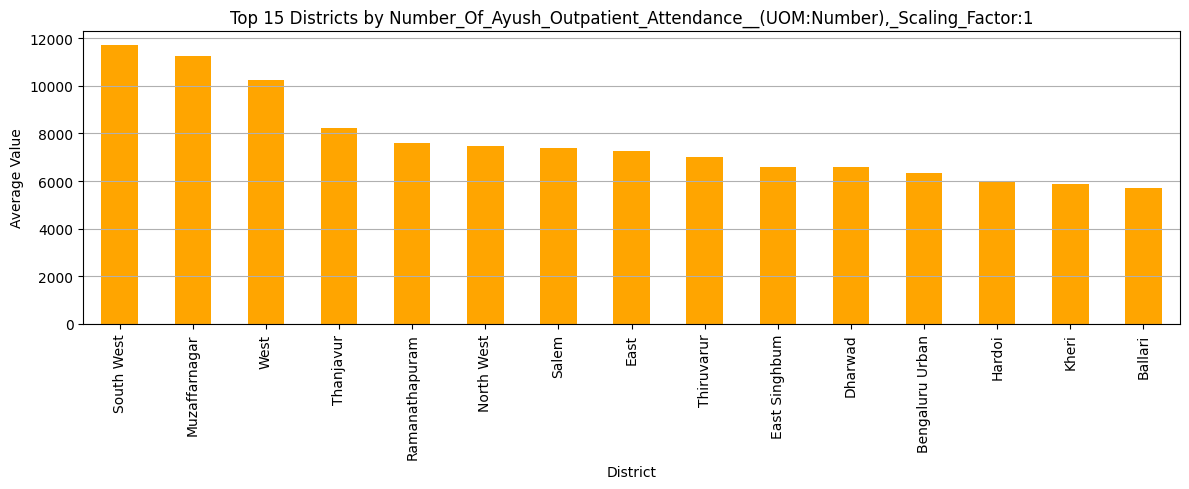

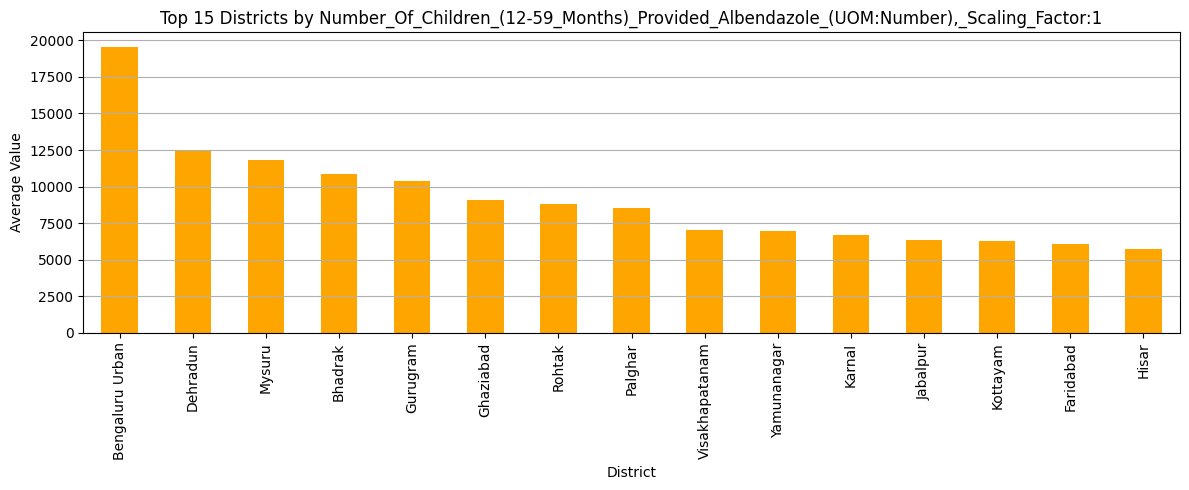

In [29]:
# Group district-wise averages for top indicators
district_grouped_all = df.groupby('District')[top_indicators.index].mean()

# Plot top 15 districts for each of the top 10 indicators
for indicator in top_indicators.index:
    top_districts = district_grouped_all[indicator].sort_values(ascending=False).head(15)

    plt.figure(figsize=(12, 5))
    top_districts.plot(kind='bar', color='orange')
    plt.title(f"Top 15 Districts by {indicator}")
    plt.ylabel("Average Value")
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [30]:
# Convert to datetime (e.g., March, 2023 → 2023-03-01)
df['Month_Parsed'] = pd.to_datetime(df['Month'], format='%B, %Y')


In [31]:
# Extract year and month as separate columns
df['Month_Name'] = df['Month_Parsed'].dt.month_name()
df['Month_Num'] = df['Month_Parsed'].dt.month
df['Year'] = df['Month_Parsed'].dt.year


In [33]:
# Monthly average for a top indicator
monthly_trend = df.groupby(['Year', 'Month_Name'])['Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1'].mean().reset_index()

# Optional: Sort by year and month
monthly_trend['Month_Num'] = pd.to_datetime(monthly_trend['Month_Name'], format='%B').dt.month
monthly_trend = monthly_trend.sort_values(['Year', 'Month_Num'])

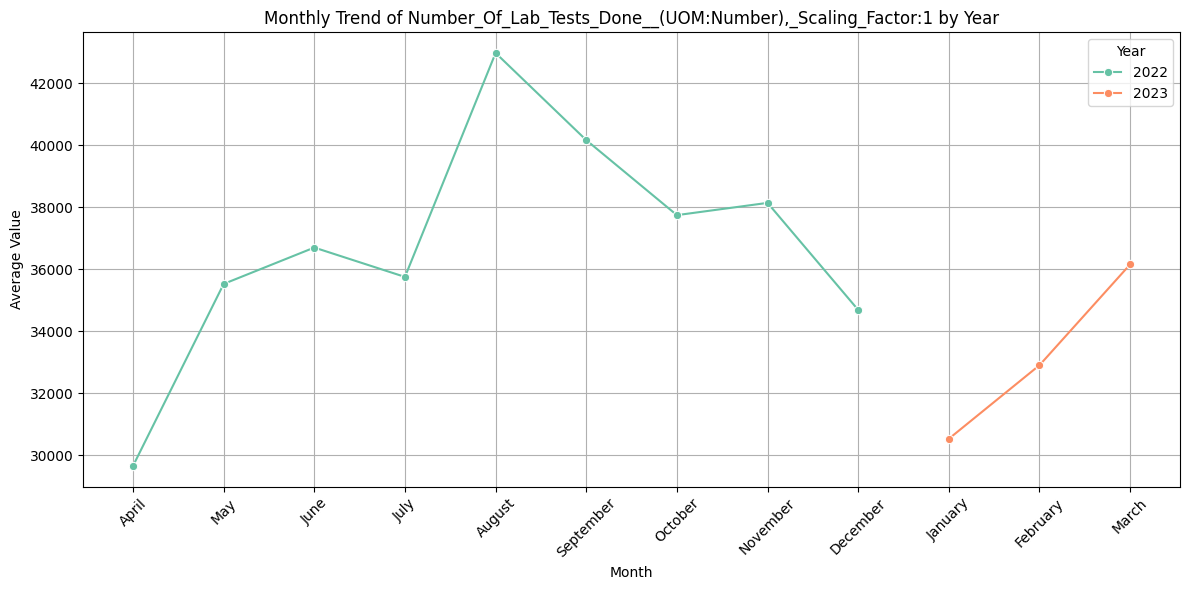

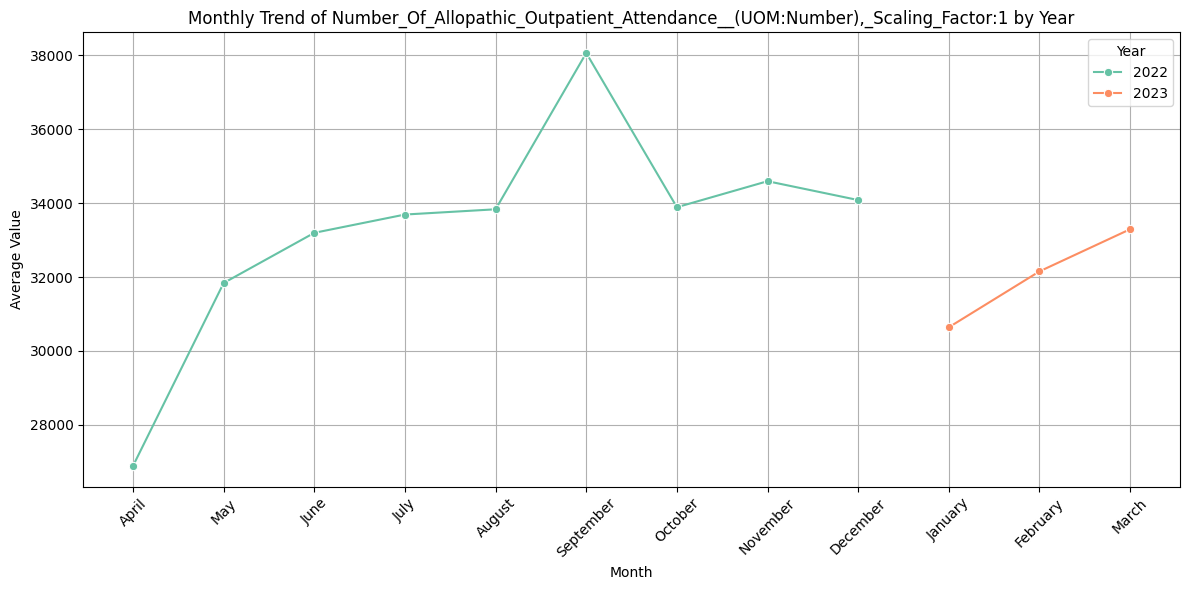

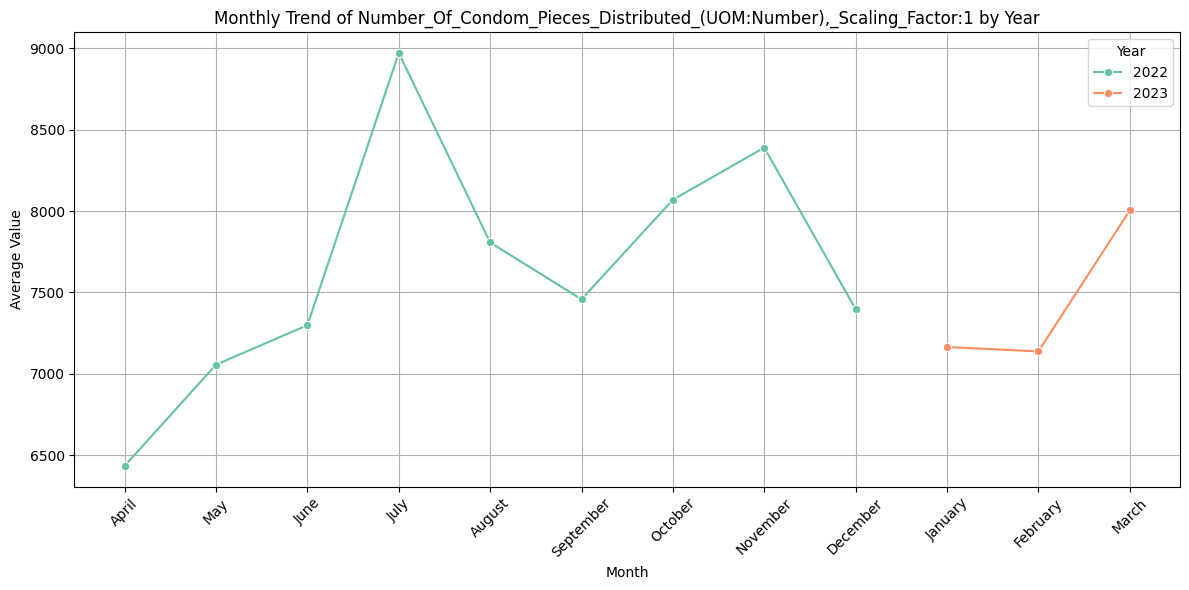

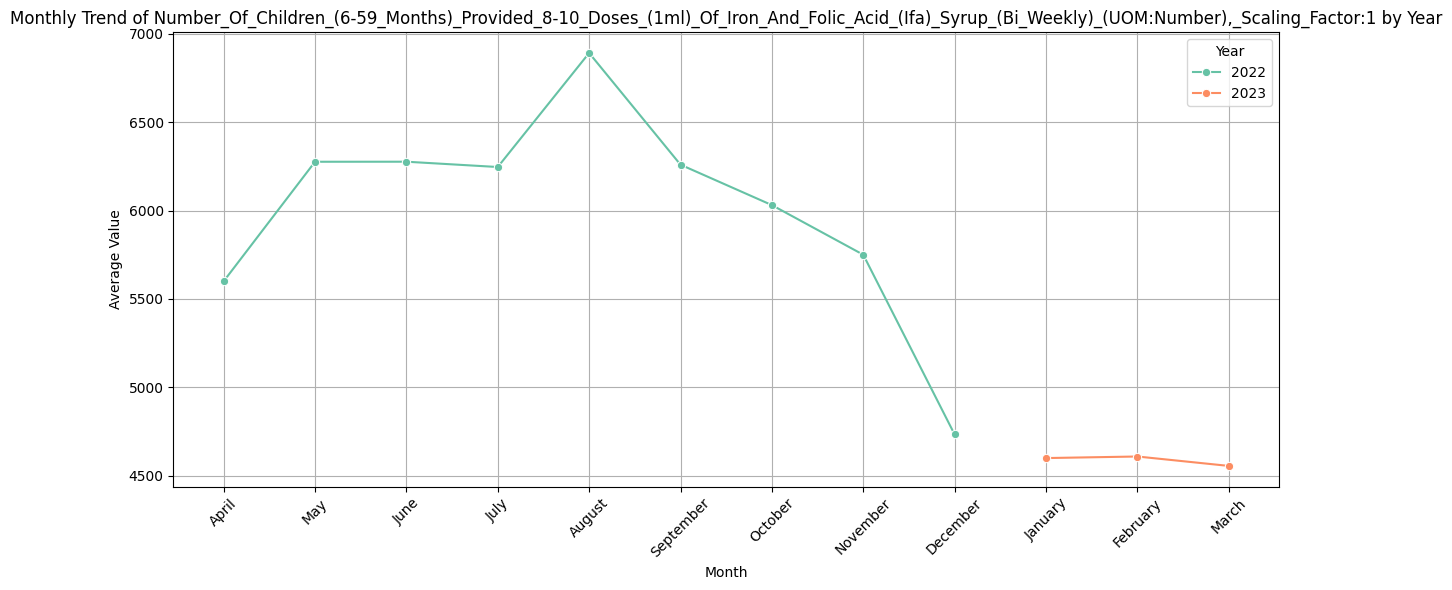

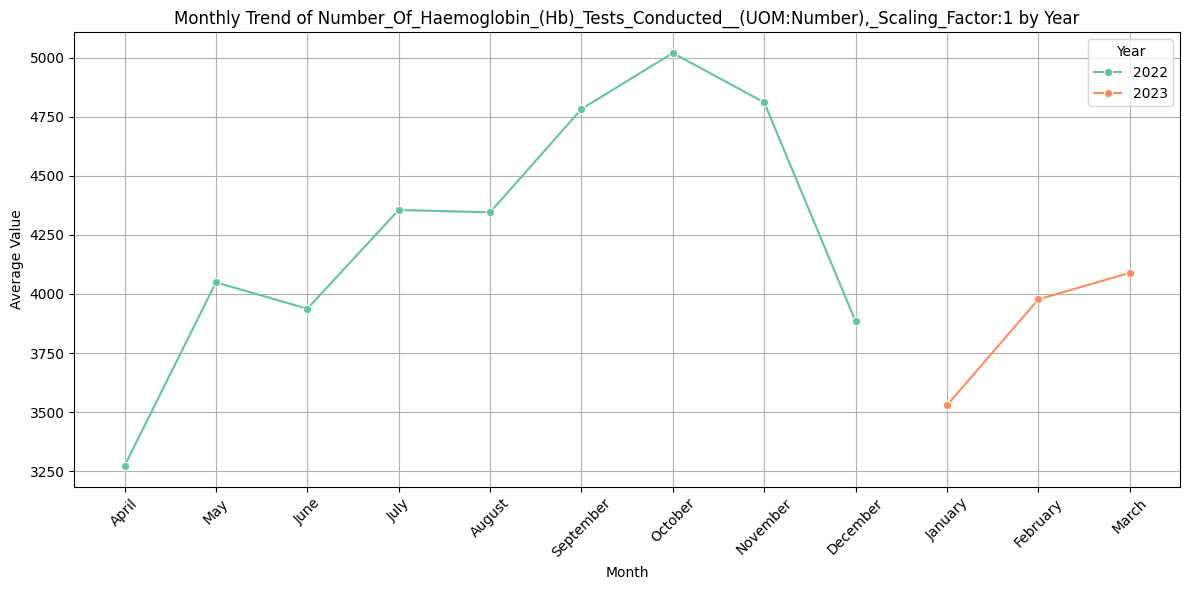

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort indicator names for consistent plotting
sorted_months = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']

for indicator in top_indicators.index[:5]:  # top 5 only
    # Group by Year and Month_Name
    monthly_trend = df.groupby(['Year', 'Month_Name'])[indicator].mean().reset_index()

    # Add month number for sorting
    monthly_trend['Month_Num'] = pd.to_datetime(monthly_trend['Month_Name'], format='%B').dt.month
    monthly_trend = monthly_trend.sort_values(['Year', 'Month_Num'])

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_trend, x='Month_Name', y=indicator, hue='Year', marker='o', palette='Set2')
    plt.title(f"Monthly Trend of {indicator} by Year")
    plt.xlabel("Month")
    plt.ylabel("Average Value")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

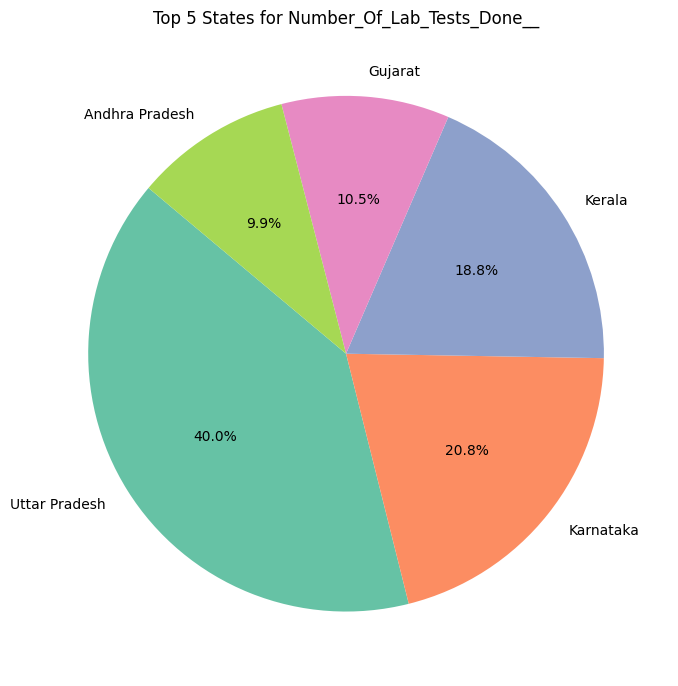

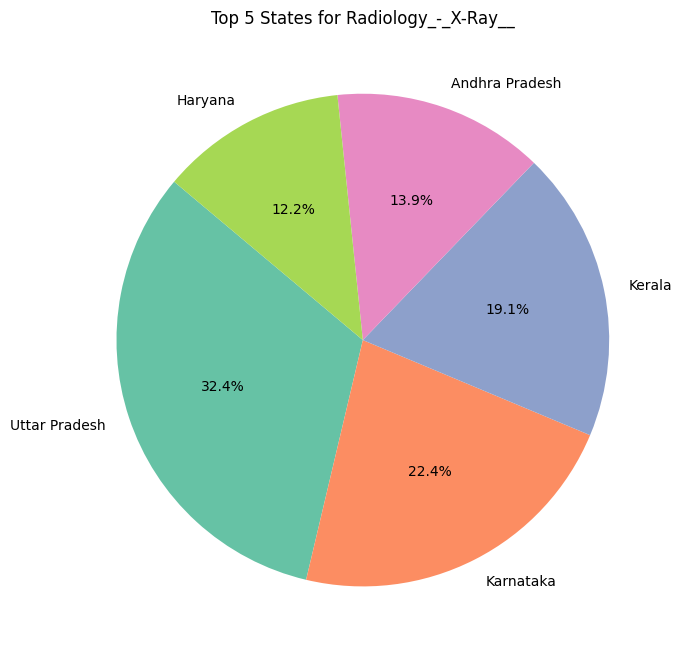

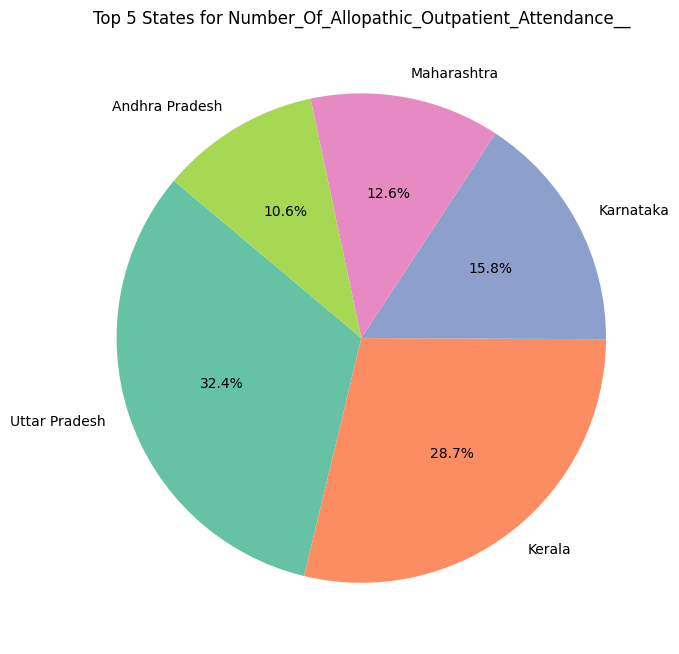

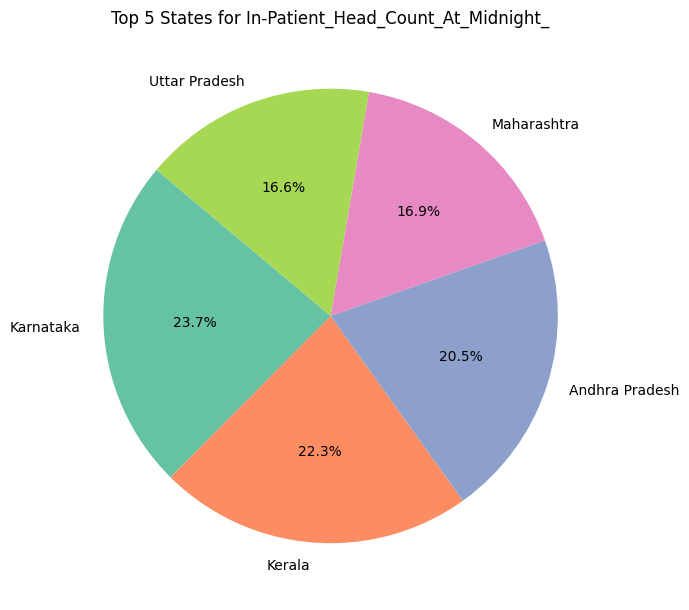

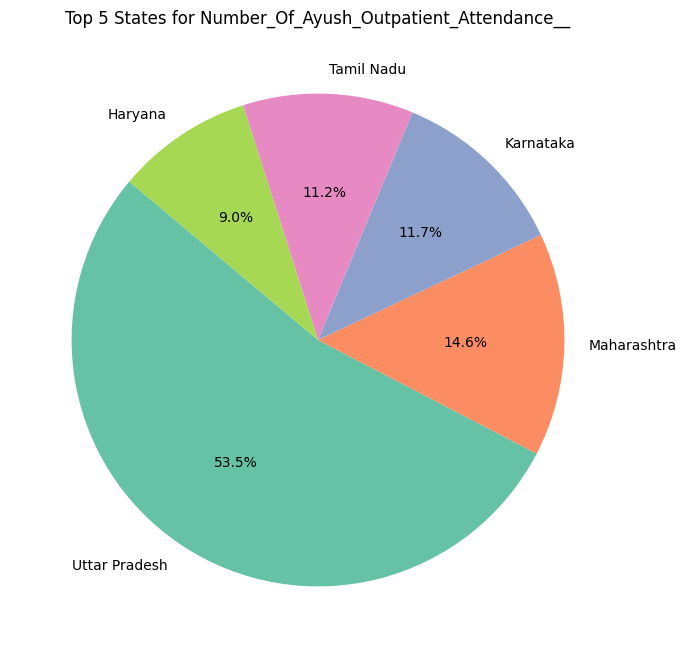

In [61]:
import matplotlib.pyplot as plt

# Define top 5 indicators
top_indicators = [
    'Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1',
    'Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1',
    'Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1',
    'In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1',
    'Number_Of_Ayush_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1'
]

# Plot a pie chart for each indicator
for indicator in top_indicators:
    # Group by state and get total for this indicator
    state_sum = df.groupby('State')[indicator].sum().sort_values(ascending=False)

    # Take top 5 states only
    top_5 = state_sum.head(5)

    # Plot pie chart
    plt.figure(figsize=(7, 7))
    top_5.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
    plt.ylabel("")
    plt.title(f"Top 5 States for {indicator.split('(')[0].strip()}")
    plt.tight_layout()
    plt.show()



In [78]:
# Calculate Sex Ratio (Females per 1000 Males)
df['Sex_Ratio_Live_Births'] = (df['Live_Birth_Of_Female_(UOM:Number),_Scaling_Factor:1'] /
                                df['Live_Birth_Of_Male__(UOM:Number),_Scaling_Factor:1']) * 1000


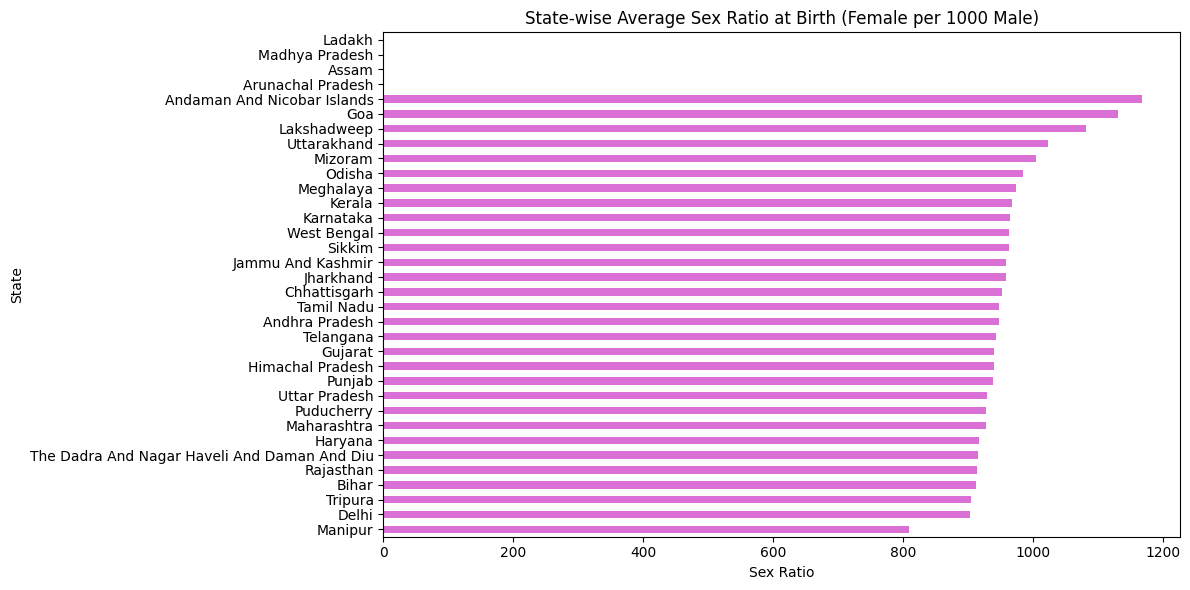

In [79]:
#plot state wise sex ratio 
state_sex_ratio = df.groupby("State")["Sex_Ratio_Live_Births"].mean().sort_values()

plt.figure(figsize=(12, 6))
state_sex_ratio.plot(kind='barh', color='orchid')
plt.title("State-wise Average Sex Ratio at Birth (Female per 1000 Male)")
plt.xlabel("Sex Ratio")
plt.tight_layout()
plt.show()

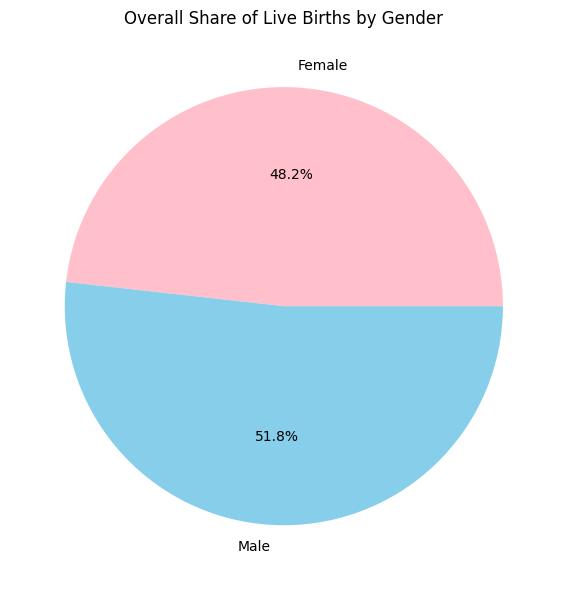

In [80]:
#Pie Chart: Share of Male vs Female Births (Overall or State-wise)
total_female = df["Live_Birth_Of_Female_(UOM:Number),_Scaling_Factor:1"].sum()
total_male = df["Live_Birth_Of_Male__(UOM:Number),_Scaling_Factor:1"].sum()

plt.figure(figsize=(6, 6))
plt.pie([total_female, total_male], labels=["Female", "Male"], autopct='%1.1f%%', colors=['pink', 'skyblue'])
plt.title("Overall Share of Live Births by Gender")
plt.tight_layout()
plt.show()


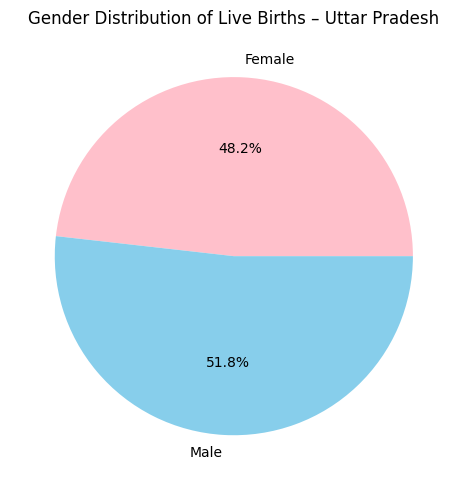

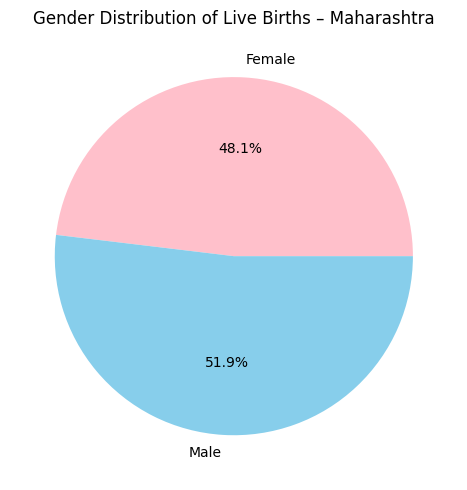

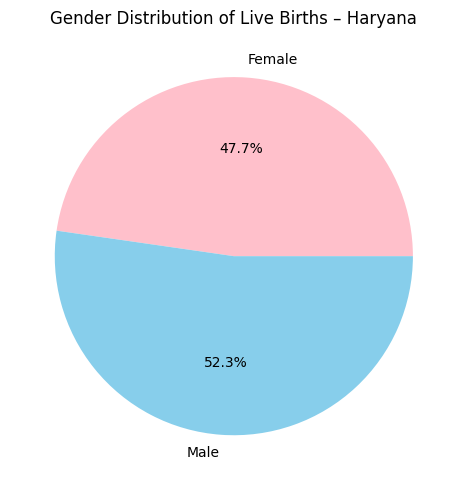

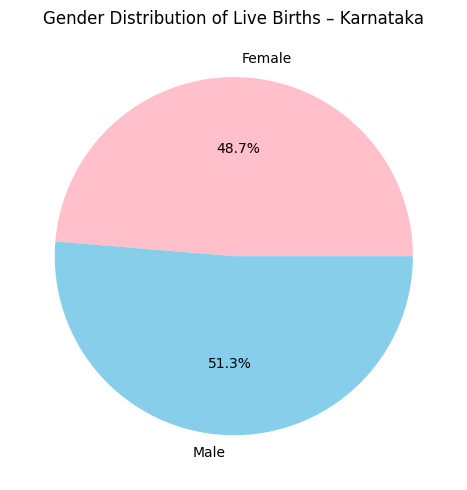

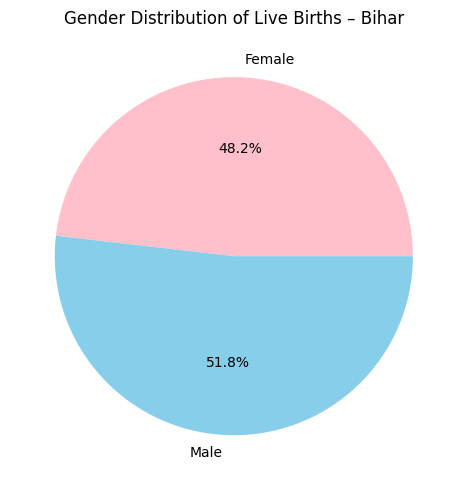

In [81]:
#Top % states with birth
df["Total_Live_Births"] = df["Live_Birth_Of_Female_(UOM:Number),_Scaling_Factor:1"] + \
                          df["Live_Birth_Of_Male__(UOM:Number),_Scaling_Factor:1"]

top_states = df.groupby("State")["Total_Live_Births"].sum().sort_values(ascending=False).head(5).index

for state in top_states:
    subset = df[df["State"] == state]
    female = subset["Live_Birth_Of_Female_(UOM:Number),_Scaling_Factor:1"].sum()
    male = subset["Live_Birth_Of_Male__(UOM:Number),_Scaling_Factor:1"].sum()

    plt.figure(figsize=(5, 5))
    plt.pie([female, male], labels=["Female", "Male"], autopct='%1.1f%%', colors=['pink', 'skyblue'])
    plt.title(f"Gender Distribution of Live Births – {state}")
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute sex ratio
df['Sex_Ratio_Live_Births'] = (
    df['Live_Birth_Of_Female_(UOM:Number),_Scaling_Factor:1'] /
    df['Live_Birth_Of_Male__(UOM:Number),_Scaling_Factor:1']
) * 1000

# Group by state for analysis
indicators = [
    'Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1',
    'Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1',
    'Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1',
    'In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1',
    'Number_Of_Ayush_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1',
    'Sex_Ratio_Live_Births'
]

grouped = df.groupby('State')[indicators].mean()

# Rank states by average of top 5 health indicators
grouped['Health_Performance_Avg'] = grouped[indicators[:-1]].mean(axis=1)

# Select top 10 states by health performance
top_10_states = grouped.sort_values('Health_Performance_Avg', ascending=False).head(10)

# Plot: Sex Ratio vs Each Indicator for Top 10 States
plt.figure(figsize=(15, 10))
for i, indicator in enumerate(indicators[:-1]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        x=top_10_states['Sex_Ratio_Live_Births'],
        y=top_10_states[indicator],
        hue=top_10_states.index,
        palette='Set2',
        s=100
    )
    plt.title(f"Sex Ratio vs {indicator.split('(')[0].strip()}")
    plt.xlabel("Sex Ratio (Females per 1000 Males)")
    plt.ylabel("Avg Indicator Value")

plt.tight_layout()
plt.suptitle("Top 10 States: Effect of Sex Ratio on Key Health Indicators", fontsize=16, y=1.03)
plt.show()



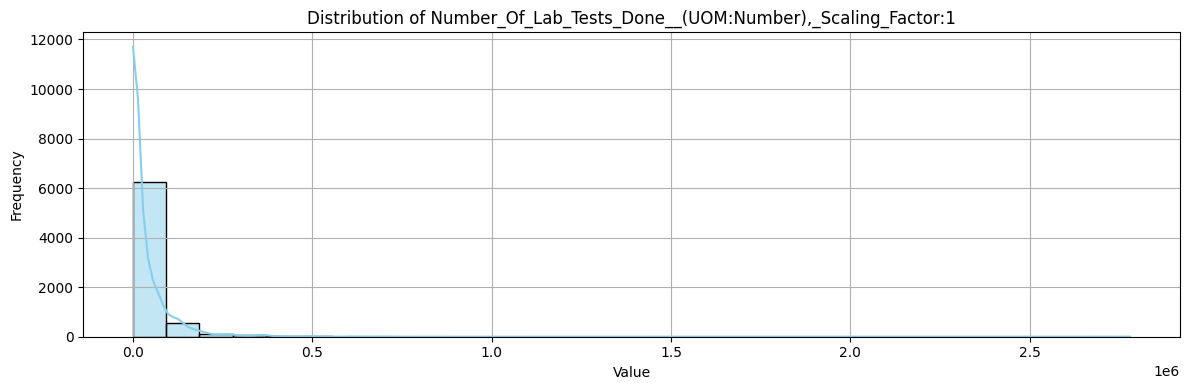

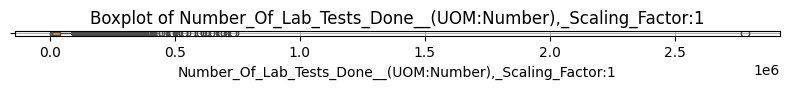

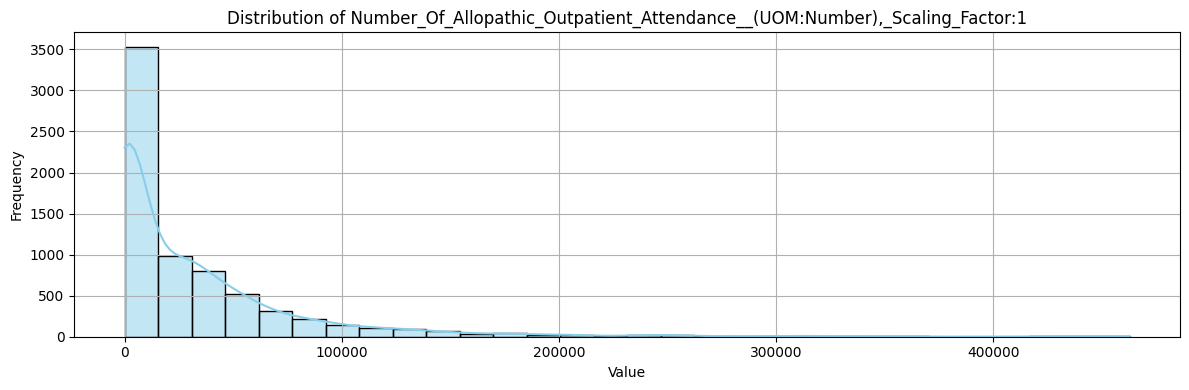

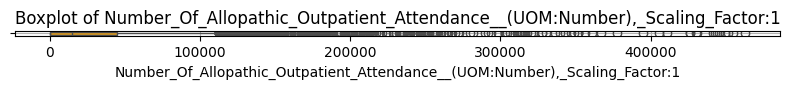

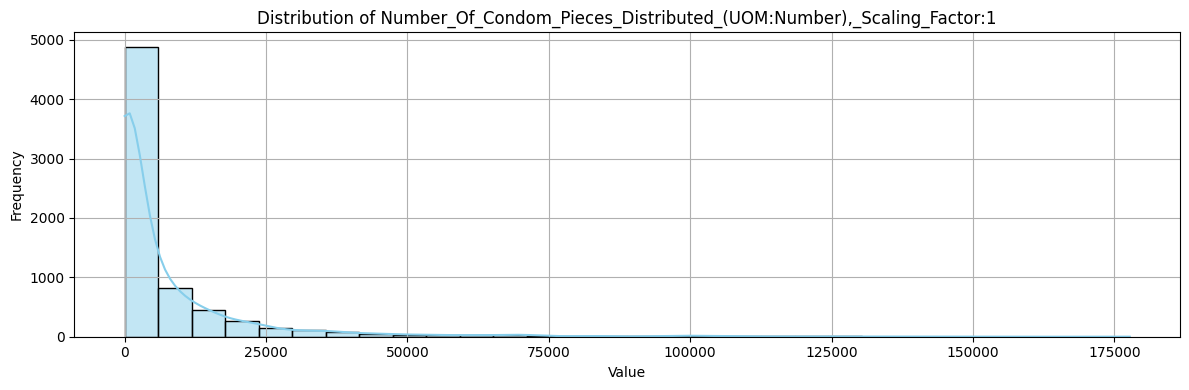

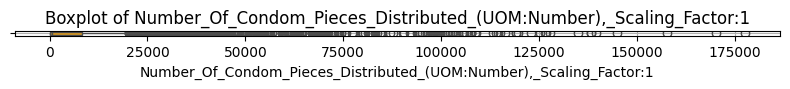

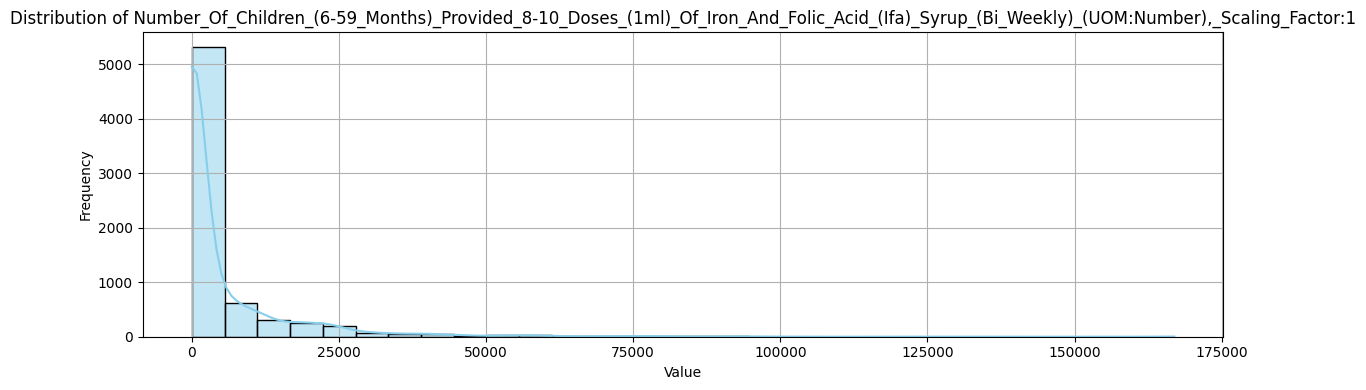

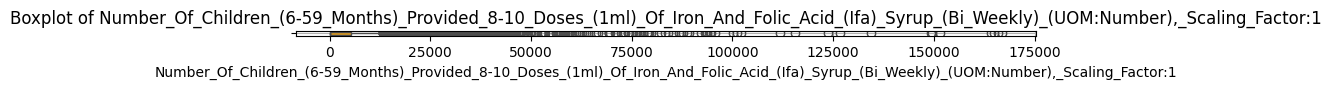

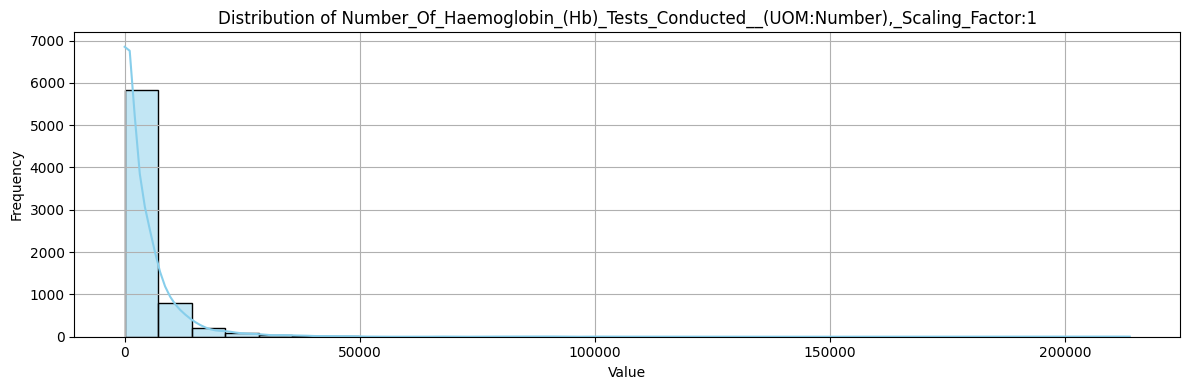

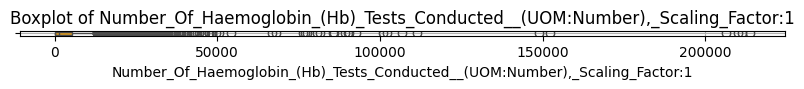

In [36]:
#Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

for indicator in top_indicators.index[:5]:
    plt.figure(figsize=(12, 4))
    
    # Histogram + KDE
    sns.histplot(df[indicator], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {indicator}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[indicator], color='orange')
    plt.title(f"Boxplot of {indicator}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


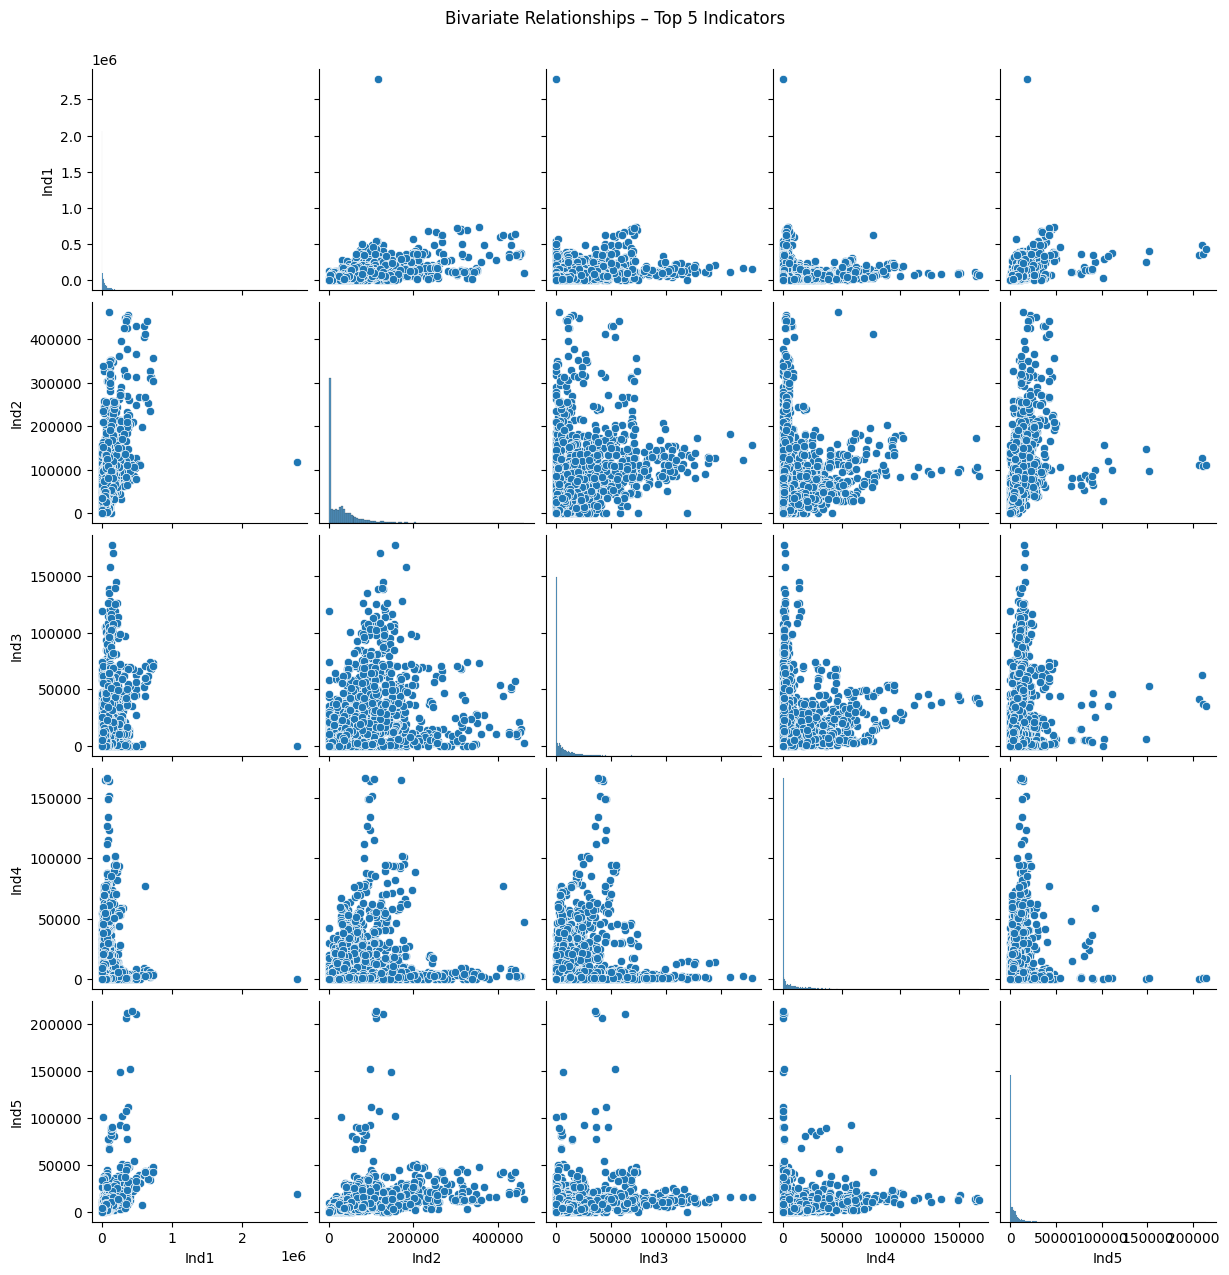

Legend:
Ind1: Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1
Ind2: Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1
Ind3: Number_Of_Condom_Pieces_Distributed_(UOM:Number),_Scaling_Factor:1
Ind4: Number_Of_Children_(6-59_Months)_Provided_8-10_Doses_(1ml)_Of_Iron_And_Folic_Acid_(Ifa)_Syrup_(Bi_Weekly)_(UOM:Number),_Scaling_Factor:1
Ind5: Number_Of_Haemoglobin_(Hb)_Tests_Conducted__(UOM:Number),_Scaling_Factor:1


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 5 indicators
top_5 = top_indicators.index[:5]

# Create a mapping of long → short names
short_names = {
    long_name: f'Ind{i+1}' for i, long_name in enumerate(top_5)
}

# Copy the data for plotting
df_plot = df[top_5].rename(columns=short_names)

# Plot with shorter labels
sns.pairplot(df_plot)
plt.suptitle("Bivariate Relationships – Top 5 Indicators", y=1.02)
plt.show()

# Optional: Print the mapping for reference
print("Legend:")
for k, v in short_names.items():
    print(f"{v}: {k}")


C:\Users\91971\AppData\Local\Temp\ipykernel_6740\3935675069.py:20: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91971\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


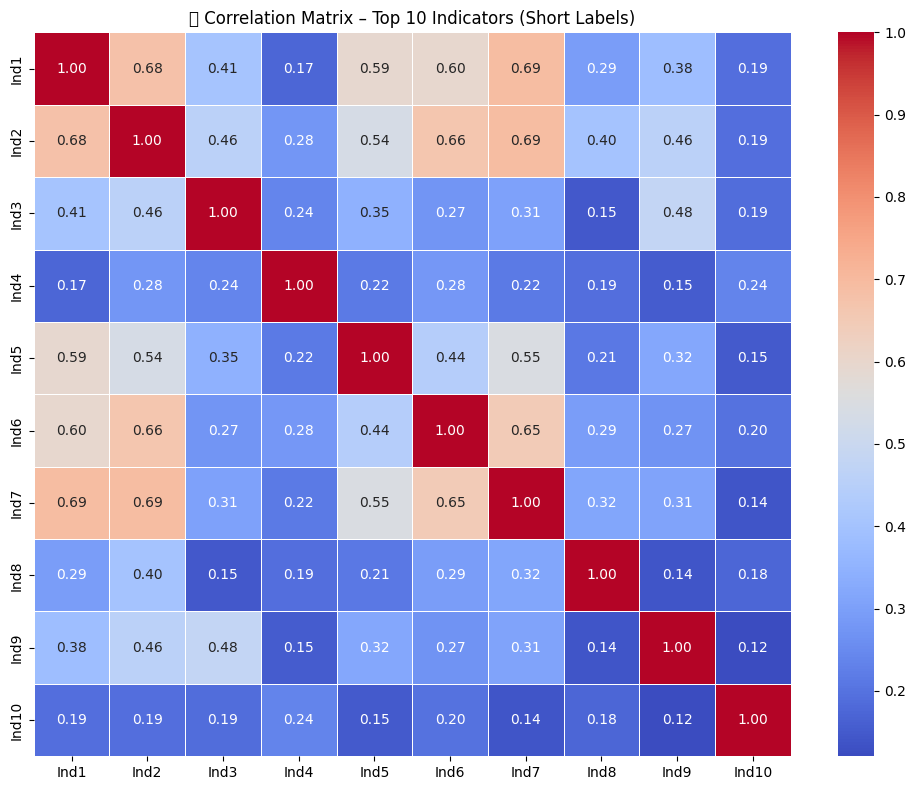

Indicator Legend:
Ind1: Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1
Ind2: Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1
Ind3: Number_Of_Condom_Pieces_Distributed_(UOM:Number),_Scaling_Factor:1
Ind4: Number_Of_Children_(6-59_Months)_Provided_8-10_Doses_(1ml)_Of_Iron_And_Folic_Acid_(Ifa)_Syrup_(Bi_Weekly)_(UOM:Number),_Scaling_Factor:1
Ind5: Number_Of_Haemoglobin_(Hb)_Tests_Conducted__(UOM:Number),_Scaling_Factor:1
Ind6: In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1
Ind7: Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1
Ind8: Patients_Registered_At_Emergency_Department_(UOM:Number),_Scaling_Factor:1
Ind9: Number_Of_Ayush_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1
Ind10: Number_Of_Children_(12-59_Months)_Provided_Albendazole_(UOM:Number),_Scaling_Factor:1


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 indicators
top_10 = top_indicators.index[:10]

# 1. Create short aliases
short_names = {long_name: f'Ind{i+1}' for i, long_name in enumerate(top_10)}

# 2. Rename for correlation calculation
df_corr_plot = df[top_10].rename(columns=short_names)

# 3. Compute correlation
corr = df_corr_plot.corr()

# 4. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Matrix – Top 10 Indicators (Short Labels)")
plt.tight_layout()
plt.show()

# Optional: Print mapping for reference
print("Indicator Legend:")
for k, v in short_names.items():
    print(f"{v}: {k}")


In [46]:
#Highly coorelated pairs
# Unstack and sort correlation values
correlations = corr_matrix.unstack().sort_values(ascending=False)

# Drop self-correlations
correlations = correlations[correlations < 1]

# Filter high correlation pairs
high_corr = correlations[correlations > 0.60]
print(" Highly Correlated Pairs:\n", high_corr)

 Highly Correlated Pairs:
 Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1                    Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1                             0.692859
Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1                           Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1                      0.692859
                                                                            Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1    0.691825
Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1  Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1                             0.691825
                                                                            Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1                      0.679363
Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1                    Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1    0.67

In [47]:
import numpy as np

# Get absolute correlation matrix for top indicators
top_10_cols = top_indicators.index[:10]
corr_matrix = df[top_10_cols].corr().abs()


In [48]:
corr_matrix

Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1  \
Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling...                                           1.000000          
Number_Of_Allopathic_Outpatient_Attendance__(UO...                                           0.679363          
Number_Of_Condom_Pieces_Distributed_(UOM:Number...                                           0.405295          
Number_Of_Children_(6-59_Months)_Provided_8-10_...                                           0.174247          
Number_Of_Haemoglobin_(Hb)_Tests_Conducted__(UO...                                           0.593723          
In-Patient_Head_Count_At_Midnight_(UOM:Number),...                                           0.596280          
Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1                                            0.692859          
Patients_Registered_At_Emergency_Department_(UO...                                           0.293948          
Number_Of_Ayush_Outpatient_Attendance__(UOM:Num...                                           0.383925          
Number_Of_Children_(12-59_Months)_Provided_Albe...                                           0.192442          

                                                    Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1  \
Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling...                                           0.679363                            
Number_Of_Allopathic_Outpatient_Attendance__(UO...                                           1.000000                            
Number_Of_Condom_Pieces_Distributed_(UOM:Number...                                           0.459449                            
Number_Of_Children_(6-59_Months)_Provided_8-10_...                                           0.277125                            
Number_Of_Haemoglobin_(Hb)_Tests_Conducted__(UO...                                           0.535321                            
In-Patient_Head_Count_At_Midnight_(UOM:Number),...                                           0.664315                            
Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1                                            0.691825                            
Patients_Registered_At_Emergency_Department_(UO...                                           0.400309                            
Number_Of_Ayush_Outpatient_Attendance__(UOM:Num...                                           0.459878                            
Number_Of_Children_(12-59_Months)_Provided_Albe...                                           0.190104                            

                                                    Number_Of_Condom_Pieces_Distributed_(UOM:Number),_Scaling_Factor:1  \
Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling...                                           0.405295                    
Number_Of_Allopathic_Outpatient_Attendance__(UO...                                           0.459449                    
Number_Of_Condom_Pieces_Distributed_(UOM:Number...                                           1.000000                    
Number_Of_Children_(6-59_Months)_Provided_8-10_...                                           0.238482                    
Number_Of_Haemoglobin_(Hb)_Tests_Conducted__(UO...                                           0.345639                    
In-Patient_Head_Count_At_Midnight_(UOM:Number),...                                           0.273318                    
Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1                                            0.305091                    
Patients_Registered_At_Emergency_Department_(UO...                                           0.146222                    
Number_Of_Ayush_Outpatient_Attendance__(UOM:Num...                                           0.478101                    
Number_Of_Children_(12-59_Months)_Provided_Albe...                                           0.185908                    

                                             

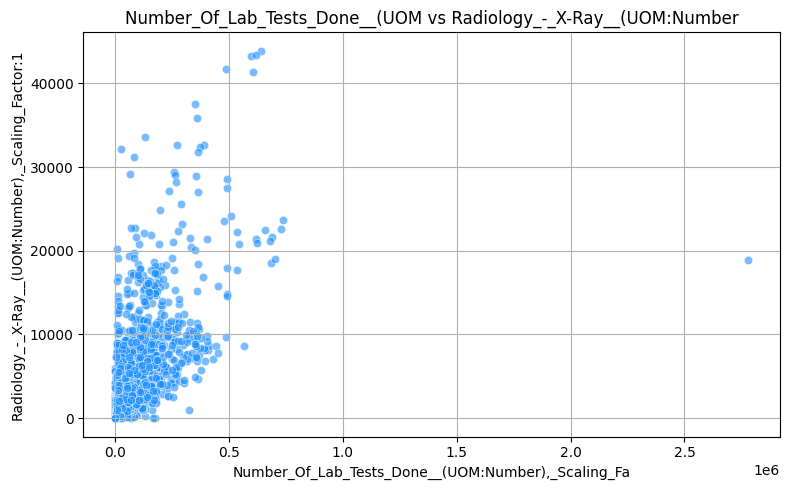

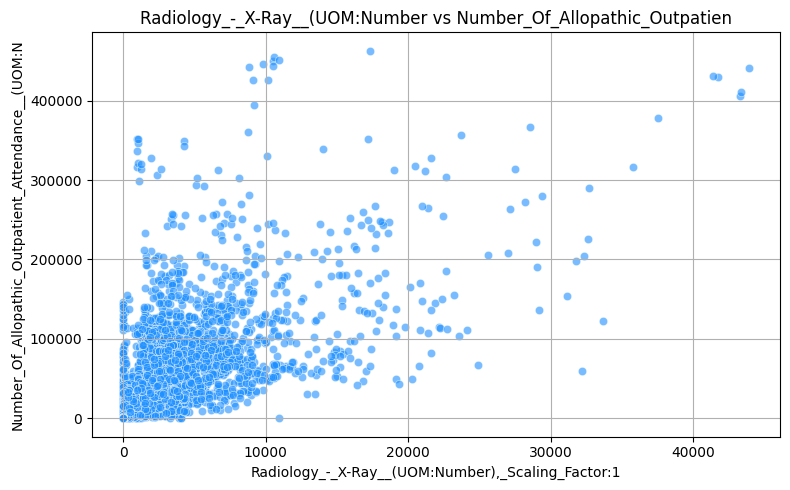

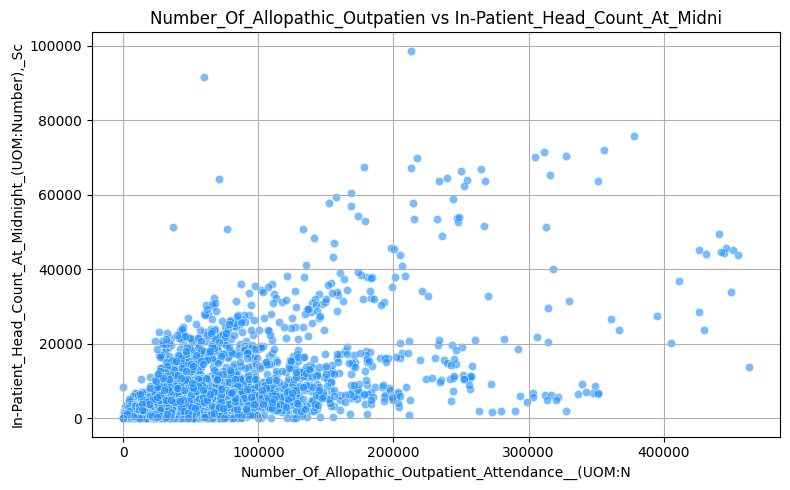

In [50]:
#Scatter Plots for Each Highly Correlated Pair
import matplotlib.pyplot as plt
import seaborn as sns

# List of correlated pairs from your output
high_corr_pairs = [
    ('Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1', 'Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1'),
    ('Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1', 'Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1'),
    ('Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1', 'In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1'),
]

# Plot each pair
for x_col, y_col in high_corr_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6, color='dodgerblue')
    plt.title(f"{x_col[:30]} vs {y_col[:30]}")
    plt.xlabel(x_col[:50])
    plt.ylabel(y_col[:50])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\91971\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


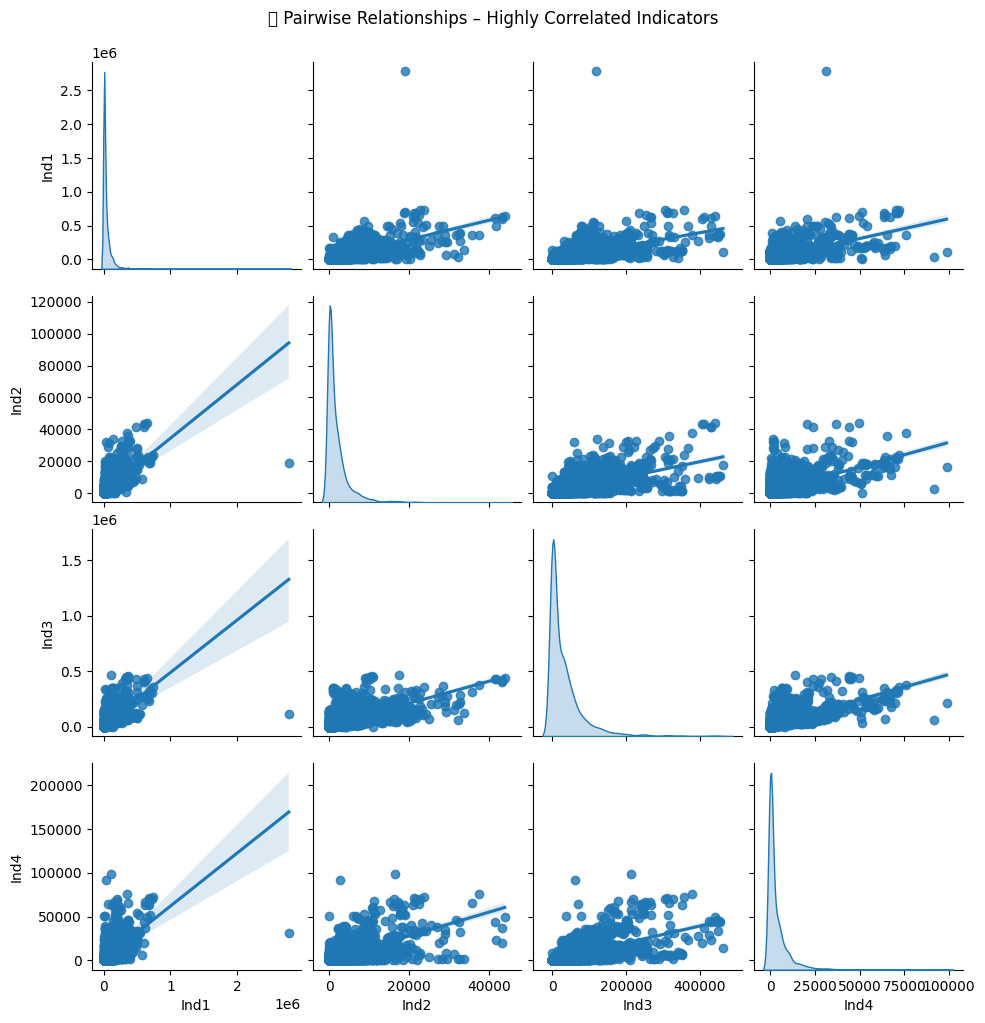

Ind1: Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1
Ind2: Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1
Ind3: Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1
Ind4: In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1


In [51]:
#Pairplot (Matrix of Plots) for 3–4 Highly Correlated Features
cols = [
    'Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1',
    'Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1',
    'Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1',
    'In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1'
]

# Use shorter names just for plotting
short_cols = {col: f"Ind{i+1}" for i, col in enumerate(cols)}
df_plot = df[cols].rename(columns=short_cols)

sns.pairplot(df_plot, kind='reg', diag_kind='kde')
plt.suptitle("📈 Pairwise Relationships – Highly Correlated Indicators", y=1.02)
plt.show()

# Optional: print legend
for k, v in short_cols.items():
    print(f"{v}: {k}")


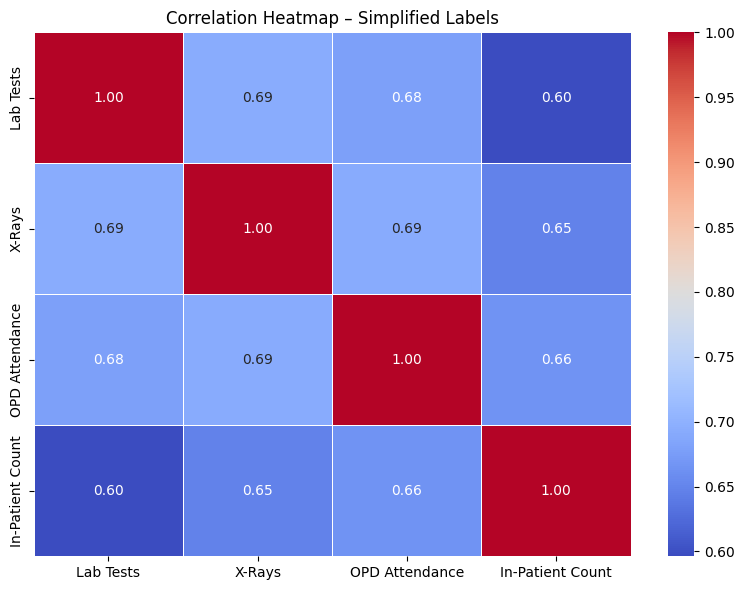

In [55]:
#Heatmap (Focused on Top Correlations)
# Step 1: Define mapping for short indicator names
short_names = {
    'Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1': 'Lab Tests',
    'Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1': 'X-Rays',
    'Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1': 'OPD Attendance',
    'In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1': 'In-Patient Count'
}

# Step 2: Subset correlation matrix from the dataframe
selected_cols = list(short_names.keys())
corr_sub = df[selected_cols].corr()

# Step 3: Rename columns and index using short labels
corr_sub.rename(columns=short_names, index=short_names, inplace=True)

# Step 4: Plot the simplified heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_sub, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap – Simplified Labels")
plt.tight_layout()
plt.show()

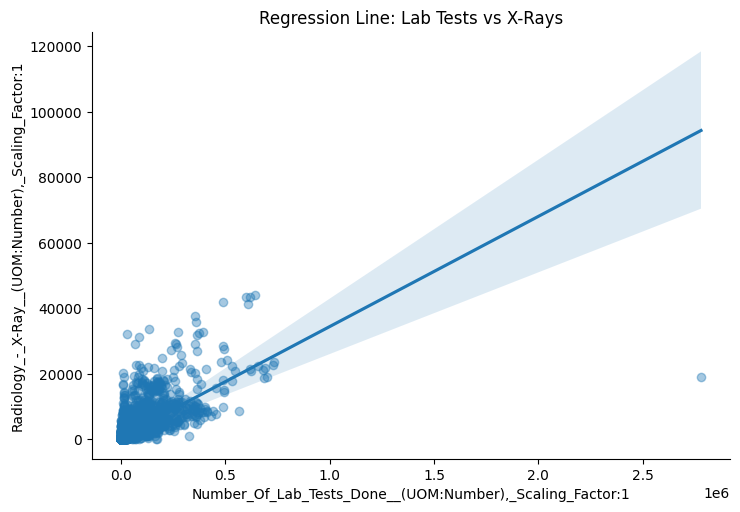

In [54]:
# Regression Line Plot for 1 Pair
sns.lmplot(
    data=df,
    x='Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1',
    y='Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1',
    aspect=1.5,
    scatter_kws={'alpha': 0.4}
)
plt.title("Regression Line: Lab Tests vs X-Rays")
plt.show()


C:\Users\91971\AppData\Local\Temp\ipykernel_6740\1525688517.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91971\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


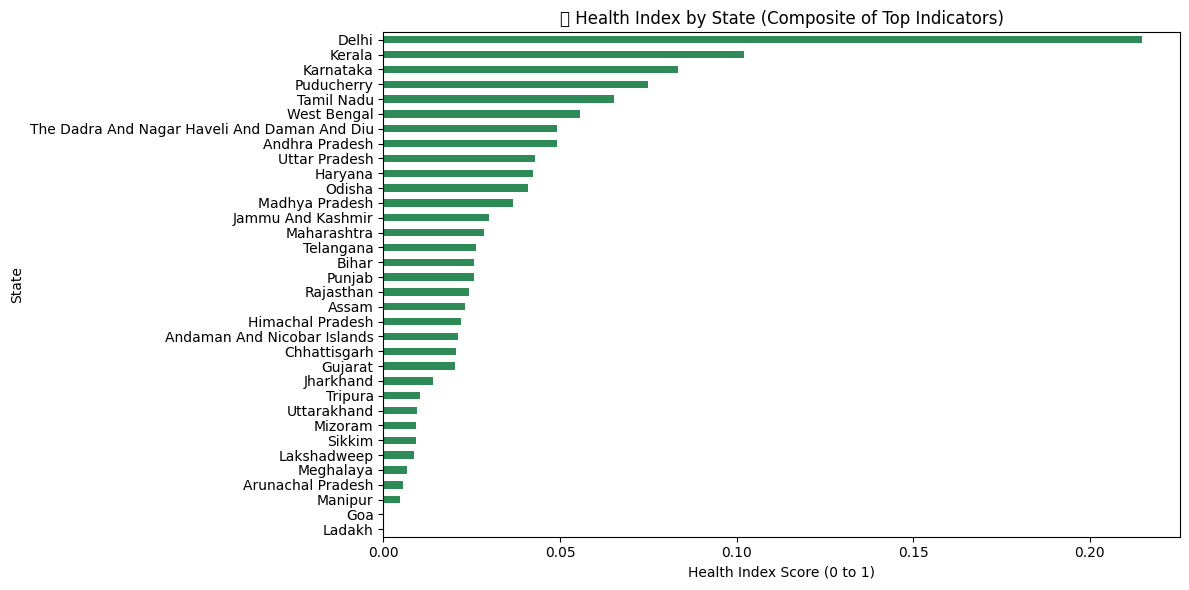

In [56]:
#health index by state 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 1: Define your top indicators
top_indicators = [
    'Number_Of_Lab_Tests_Done__(UOM:Number),_Scaling_Factor:1',
    'Radiology_-_X-Ray__(UOM:Number),_Scaling_Factor:1',
    'Number_Of_Allopathic_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1',
    'In-Patient_Head_Count_At_Midnight_(UOM:Number),_Scaling_Factor:1',
    'Number_Of_Ayush_Outpatient_Attendance__(UOM:Number),_Scaling_Factor:1'
]

# Step 2: Normalize these indicator columns using Min-Max scaling
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[top_indicators] = scaler.fit_transform(df_scaled[top_indicators])

# Step 3: Group by state and compute average for each normalized indicator
state_health_index = df_scaled.groupby('State')[top_indicators].mean()

# Step 4: Calculate the composite health index (average of indicators)
state_health_index['Health_Index'] = state_health_index.mean(axis=1)

# Step 5: Sort states by health index
state_health_index_sorted = state_health_index[['Health_Index']].sort_values(by='Health_Index', ascending=False)

# Step 6: Plot Health Index by State
plt.figure(figsize=(12, 6))
state_health_index_sorted['Health_Index'].plot(kind='barh', color='seagreen')
plt.xlabel("Health Index Score (0 to 1)")
plt.title("📈 Health Index by State (Composite of Top Indicators)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
